<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Data Visualization

Estimated time needed: **30** minutes

## Objectives

After completing this lab you will be able to:

*   Create Data Visualization with Python
*   Use various Python libraries for visualization


## Introduction

The aim of these labs is to introduce you to data visualization with Python as concrete and as consistent as possible.
Speaking of consistency, because there is no *best* data visualization library available for Python - up to creating these labs - we have to introduce different libraries and show their benefits when we are discussing new visualization concepts. Doing so, we hope to make students well-rounded with visualization libraries and concepts so that they are able to judge and decide on the best visualization technique and tool for a given problem *and* audience.

Please make sure that you have completed the prerequisites for this course, namely [**Python Basics for Data Science**](https://www.edx.org/course/python-basics-for-data-science-2?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) and [**Analyzing Data with Python**](https://www.edx.org/course/data-analysis-with-python?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01).

**Note**: The majority of the plots and visualizations will be generated using data stored in *pandas* dataframes. Therefore, in this lab, we provide a brief crash course on *pandas*. However, if you are interested in learning more about the *pandas* library, detailed description and explanation of how to use it and how to clean, munge, and process data stored in a *pandas* dataframe are provided in our course [**Analyzing Data with Python**](https://www.edx.org/course/data-analysis-with-python?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01).

***


## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

1.  [Exploring Datasets with *pandas*](#0)<br>

1.1 [The Dataset: Immigration to Canada from 1980 to 2013](#2)<br>
1.2 [*pandas* Basics](#4) <br>
1.3 [*pandas* Intermediate: Indexing and Selection](#6) <br>
2\. [Visualizing Data using Matplotlib](#8) <br>
2.1 [Matplotlib: Standard Python Visualization Library](#10) <br>
3\. [Line Plots](#12)

</div>


# Exploring Datasets with *pandas* <a id="0"></a>

*pandas* is an essential data analysis toolkit for Python. From their [website](http://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01):

> *pandas* is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, **real world** data analysis in Python.

The course heavily relies on *pandas* for data wrangling, analysis, and visualization. We encourage you to spend some time and familiarize yourself with the *pandas* API Reference: [http://pandas.pydata.org/pandas-docs/stable/api.html](http://pandas.pydata.org/pandas-docs/stable/api.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01).


## The Dataset: Immigration to Canada from 1980 to 2013 <a id="2"></a>


Dataset Source: [International migration flows to and from selected countries - The 2015 revision](http://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01).

The dataset contains annual data on the flows of international immigrants as recorded by the countries of destination. The data presents both inflows and outflows according to the place of birth, citizenship or place of previous / next residence both for foreigners and nationals. The current version presents data pertaining to 45 countries.

In this lab, we will focus on the Canadian immigration data.

![Data Preview](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%201/images/DataSnapshot.png)

The Canada Immigration dataset can be fetched from <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01">here</a>.

***


## *pandas* Basics<a id="4"></a>


The first thing we'll do is import two key data analysis modules: *pandas* and *numpy*.


In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
! pip3 install openpyxl

     |████████████████████████████████| 242 kB 9.3 MB/s eta 0:00:01


Let's download and import our primary Canadian Immigration dataset using *pandas*'s `read_excel()` method. Normally, before we can do that, we would need to download a module which *pandas* requires reading in Excel files. This module was **openpyxl** (formerlly **xlrd**). For your convenience, we have pre-installed this module, so you would not have to worry about that. Otherwise, you would need to run the following line of code to install the **openpyxl** module:

```
! pip3 install openpyxl
```


Now we are ready to read in our data.


In [2]:
df_can = pd.read_excel(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)

print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


Let's view the top 5 rows of the dataset using the `head()` function.


In [3]:
df_can.head()
# tip: You can specify the number of rows you'd like to see as follows: df_can.head(10) 

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


We can also view the bottom 5 rows of the dataset using the `tail()` function.


In [4]:
df_can.tail()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59
194,Immigrants,Foreigners,Zimbabwe,903,Africa,910,Eastern Africa,902,Developing regions,72,...,1450,615,454,663,611,508,494,434,437,407


When analyzing a dataset, it's always a good idea to start by getting basic information about your dataframe. We can do this by using the `info()` method.

This method can be used to get a short summary of the dataframe.


In [5]:
df_can.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 43 entries, Type to 2013
dtypes: int64(37), object(6)
memory usage: 65.6+ KB


To get the list of column headers we can call upon the data frame's `columns` instance variable.


In [6]:
df_can.columns

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

Similarly, to get the list of indices we use the `.index` instance variables.


In [7]:
df_can.index

RangeIndex(start=0, stop=195, step=1)

Note: The default type of intance variables `index` and `columns` are **NOT** `list`.


In [8]:
print(type(df_can.columns))
print(type(df_can.index))

<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.range.RangeIndex'>


To get the index and columns as lists, we can use the `tolist()` method.


In [9]:
df_can.columns.tolist()

['Type',
 'Coverage',
 'OdName',
 'AREA',
 'AreaName',
 'REG',
 'RegName',
 'DEV',
 'DevName',
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013]

In [10]:
df_can.index.tolist()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [11]:
print(type(df_can.columns.tolist()))
print(type(df_can.index.tolist()))

<class 'list'>
<class 'list'>


To view the dimensions of the dataframe, we use the `shape` instance variable of it.


In [12]:
# size of dataframe (rows, columns)
df_can.shape    

(195, 43)

**Note**: The main types stored in *pandas* objects are `float`, `int`, `bool`, `datetime64[ns]`, `datetime64[ns, tz]`, `timedelta[ns]`, `category`, and `object` (string). In addition, these dtypes have item sizes, e.g. `int64` and `int32`.


Let's clean the data set to remove a few unnecessary columns. We can use *pandas* `drop()` method as follows:


In [13]:
# in pandas axis=0 represents rows (default) and axis=1 represents columns.
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


Let's rename the columns so that they make sense. We can use `rename()` method by passing in a dictionary of old and new names as follows:


In [14]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

We will also add a 'Total' column that sums up the total immigrants by country over the entire period 1980 - 2013, as follows:


In [15]:
df_can['Total'] = df_can.sum(axis=1)

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


We can check to see how many null objects we have in the dataset as follows:


In [16]:
df_can.isnull().sum()

Country      0
Continent    0
Region       0
DevName      0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
Total        0
dtype: int64

Finally, let's view a quick summary of each column in our dataframe using the `describe()` method.


In [17]:
df_can.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,...,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564,32867.451282
std,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,...,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988,91785.498686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,...,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000,952.000000
50%,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,...,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000,5018.000000
75%,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,...,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000,22239.500000
max,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,...,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000,691904.000000


***

## *pandas* Intermediate: Indexing and Selection (slicing)<a id="6"></a>


### Select Column

**There are two ways to filter on a column name:**

Method 1: Quick and easy, but only works if the column name does NOT have spaces or special characters.

```python
    df.column_name               # returns series
```

Method 2: More robust, and can filter on multiple columns.

```python
    df['column']                  # returns series
```

```python
    df[['column 1', 'column 2']]  # returns dataframe
```

***


Example: Let's try filtering on the list of countries ('Country').


In [18]:
df_can.Country  # returns a series

0         Afghanistan
1             Albania
2             Algeria
3      American Samoa
4             Andorra
            ...      
190          Viet Nam
191    Western Sahara
192             Yemen
193            Zambia
194          Zimbabwe
Name: Country, Length: 195, dtype: object

Let's try filtering on the list of countries ('Country') and the data for years: 1980 - 1985.


In [19]:
df_can[['Country', 1980, 1981, 1982, 1983, 1984, 1985]] # returns a dataframe
# notice that 'Country' is string, and the years are integers. 
# for the sake of consistency, we will convert all column names to string later on.

,Country,1980,1981,1982,1983,1984,1985
0,Afghanistan,16,39,39,47,71,340
1,Albania,1,0,0,0,0,0
2,Algeria,80,67,71,69,63,44
3,American Samoa,0,1,0,0,0,0
4,Andorra,0,0,0,0,0,0
...,...,...,...,...,...,...,...
190,Viet Nam,1191,1829,2162,3404,7583,5907
191,Western Sahara,0,0,0,0,0,0
192,Yemen,1,2,1,6,0,18
193,Zambia,11,17,11,7,16,9


### Select Row

There are main 2 ways to select rows:

```python
    df.loc[label]    # filters by the labels of the index/column
    df.iloc[index]   # filters by the positions of the index/column
```


Before we proceed, notice that the default index of the dataset is a numeric range from 0 to 194. This makes it very difficult to do a query by a specific country. For example to search for data on Japan, we need to know the corresponding index value.

This can be fixed very easily by setting the 'Country' column as the index using `set_index()` method.


In [20]:
df_can.set_index('Country', inplace=True)
# tip: The opposite of set is reset. So to reset the index, we can use df_can.reset_index()

In [21]:
df_can.head(3)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


In [22]:
# optional: to remove the name of the index
df_can.index.name = None

Example: Let's view the number of immigrants from Japan (row 87) for the following scenarios:
1\. The full row data (all columns)
2\. For year 2013
3\. For years 1980 to 1985


In [23]:
# 1. the full row data (all columns)
df_can.loc['Japan']

Continent                 Asia
Region            Eastern Asia
DevName      Developed regions
1980                       701
1981                       756
1982                       598
1983                       309
1984                       246
1985                       198
1986                       248
1987                       422
1988                       324
1989                       494
1990                       379
1991                       506
1992                       605
1993                       907
1994                       956
1995                       826
1996                       994
1997                       924
1998                       897
1999                      1083
2000                      1010
2001                      1092
2002                       806
2003                       817
2004                       973
2005                      1067
2006                      1212
2007                      1250
2008                      1284
2009    

In [24]:
# alternate methods
df_can.iloc[87]

Continent                 Asia
Region            Eastern Asia
DevName      Developed regions
1980                       701
1981                       756
1982                       598
1983                       309
1984                       246
1985                       198
1986                       248
1987                       422
1988                       324
1989                       494
1990                       379
1991                       506
1992                       605
1993                       907
1994                       956
1995                       826
1996                       994
1997                       924
1998                       897
1999                      1083
2000                      1010
2001                      1092
2002                       806
2003                       817
2004                       973
2005                      1067
2006                      1212
2007                      1250
2008                      1284
2009    

In [25]:
df_can[df_can.index == 'Japan']

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Japan,Asia,Eastern Asia,Developed regions,701,756,598,309,246,198,248,...,1067,1212,1250,1284,1194,1168,1265,1214,982,27707


In [26]:
# 2. for year 2013
df_can.loc['Japan', 2013]

982

In [27]:
# alternate method
# year 2013 is the last column, with a positional index of 36
df_can.iloc[87, 36]

982

In [28]:
# 3. for years 1980 to 1985
df_can.loc['Japan', [1980, 1981, 1982, 1983, 1984, 1984]]

1980    701
1981    756
1982    598
1983    309
1984    246
1984    246
Name: Japan, dtype: object

In [29]:
# Alternative Method
df_can.iloc[87, [3, 4, 5, 6, 7, 8]]

1980    701
1981    756
1982    598
1983    309
1984    246
1985    198
Name: Japan, dtype: object

Column names that are integers (such as the years) might introduce some confusion. For example, when we are referencing the year 2013, one might confuse that when the 2013th positional index.

To avoid this ambuigity, let's convert the column names into strings: '1980' to '2013'.


In [30]:
df_can.columns = list(map(str, df_can.columns))
# [print (type(x)) for x in df_can.columns.values] #<-- uncomment to check type of column headers

Since we converted the years to string, let's declare a variable that will allow us to easily call upon the full range of years:


In [31]:
# useful for plotting later on
years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

### Filtering based on a criteria

To filter the dataframe based on a condition, we simply pass the condition as a boolean vector.

For example, Let's filter the dataframe to show the data on Asian countries (AreaName = Asia).


In [32]:
# 1. create the condition boolean series
condition = df_can['Continent'] == 'Asia'
print(condition)

Afghanistan        True
Albania           False
Algeria           False
American Samoa    False
Andorra           False
                  ...  
Viet Nam           True
Western Sahara    False
Yemen              True
Zambia            False
Zimbabwe          False
Name: Continent, Length: 195, dtype: bool


In [33]:
# 2. pass this condition into the dataFrame
df_can[condition]

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Armenia,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,224,218,198,205,267,252,236,258,207,3310
Azerbaijan,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,359,236,203,125,165,209,138,161,57,2649
Bahrain,Asia,Western Asia,Developing regions,0,2,1,1,1,3,0,...,12,12,22,9,35,28,21,39,32,475
Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,...,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568
Bhutan,Asia,Southern Asia,Developing regions,0,0,0,0,1,0,0,...,5,10,7,36,865,1464,1879,1075,487,5876
Brunei Darussalam,Asia,South-Eastern Asia,Developing regions,79,6,8,2,2,4,12,...,4,5,11,10,5,12,6,3,6,600
Cambodia,Asia,South-Eastern Asia,Developing regions,12,19,26,33,10,7,8,...,370,529,460,354,203,200,196,233,288,6538
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
"China, Hong Kong Special Administrative Region",Asia,Eastern Asia,Developing regions,0,0,0,0,0,0,0,...,729,712,674,897,657,623,591,728,774,9327


In [34]:
# we can pass multiple criteria in the same line.
# let's filter for AreaNAme = Asia and RegName = Southern Asia

df_can[(df_can['Continent']=='Asia') & (df_can['Region']=='Southern Asia')]

# note: When using 'and' and 'or' operators, pandas requires we use '&' and '|' instead of 'and' and 'or'
# don't forget to enclose the two conditions in parentheses

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,...,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568
Bhutan,Asia,Southern Asia,Developing regions,0,0,0,0,1,0,0,...,5,10,7,36,865,1464,1879,1075,487,5876
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Maldives,Asia,Southern Asia,Developing regions,0,0,0,1,0,0,0,...,0,0,2,1,7,4,3,1,1,30
Nepal,Asia,Southern Asia,Developing regions,1,1,6,1,2,4,13,...,607,540,511,581,561,1392,1129,1185,1308,10222
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358


Before we proceed: let's review the changes we have made to our dataframe.


In [35]:
print('data dimensions:', df_can.shape)
print(df_can.columns)
df_can.head(2)

data dimensions: (195, 38)
Index(['Continent', 'Region', 'DevName', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'Total'],
      dtype='object')


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699


***

# Visualizing Data using Matplotlib<a id="8"></a>


## Matplotlib: Standard Python Visualization Library<a id="10"></a>

The primary plotting library we will explore in the course is [Matplotlib](http://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01).  As mentioned on their website:

> Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shell, the jupyter notebook, web application servers, and four graphical user interface toolkits.

If you are aspiring to create impactful visualization with python, Matplotlib is an essential tool to have at your disposal.


### Matplotlib.Pyplot

One of the core aspects of Matplotlib is `matplotlib.pyplot`. It is Matplotlib's scripting layer which we studied in details in the videos about Matplotlib. Recall that it is a collection of command style functions that make Matplotlib work like MATLAB. Each `pyplot` function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc. In this lab, we will work with the scripting layer to learn how to generate line plots. In future labs, we will get to work with the Artist layer as well to experiment first hand how it differs from the scripting layer.


Let's start by importing `matplotlib` and `matplotlib.pyplot` as follows:


In [36]:
# we are using the inline backend
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

\*optional: check if Matplotlib is loaded.


In [37]:
print('Matplotlib version: ', mpl.__version__)  # >= 2.0.0

Matplotlib version:  3.4.3


\*optional: apply a style to Matplotlib.


In [38]:
print(plt.style.available)
mpl.style.use(['ggplot']) # optional: for ggplot-like style

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


### Plotting in *pandas*

Fortunately, pandas has a built-in implementation of Matplotlib that we can use. Plotting in *pandas* is as simple as appending a `.plot()` method to a series or dataframe.

Documentation:

*   [Plotting with Series](http://pandas.pydata.org/pandas-docs/stable/api.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01#plotting)<br>
*   [Plotting with Dataframes](http://pandas.pydata.org/pandas-docs/stable/api.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01#api-dataframe-plotting)


# Line Pots (Series/Dataframe) <a id="12"></a>


**What is a line plot and why use it?**

A line chart or line plot is a type of plot which displays information as a series of data points called 'markers' connected by straight line segments. It is a basic type of chart common in many fields.
Use line plot when you have a continuous data set. These are best suited for trend-based visualizations of data over a period of time.


**Let's start with a case study:**

In 2010, Haiti suffered a catastrophic magnitude 7.0 earthquake. The quake caused widespread devastation and loss of life and aout three million people were affected by this natural disaster. As part of Canada's humanitarian effort, the Government of Canada stepped up its effort in accepting refugees from Haiti. We can quickly visualize this effort using a `Line` plot:

**Question:** Plot a line graph of immigration from Haiti using `df.plot()`.


First, we will extract the data series for Haiti.


In [39]:
haiti = df_can.loc['Haiti', years] # passing in years 1980 - 2013 to exclude the 'total' column
haiti.head()

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
Name: Haiti, dtype: object

Next, we will plot a line plot by appending `.plot()` to the `haiti` dataframe.


<AxesSubplot:>

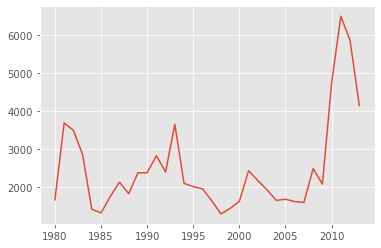

In [40]:
haiti.plot()

*pandas* automatically populated the x-axis with the index values (years), and the y-axis with the column values (population). However, notice how the years were not displayed because they are of type *string*. Therefore, let's change the type of the index values to *integer* for plotting.

Also, let's label the x and y axis using `plt.title()`, `plt.ylabel()`, and `plt.xlabel()` as follows:


In [ ]:
haiti.index = haiti.index.map(int) # let's change the index values of Haiti to type integer for plotting
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show() # need this line to show the updates made to the figure

We can clearly notice how number of immigrants from Haiti spiked up from 2010 as Canada stepped up its efforts to accept refugees from Haiti. Let's annotate this spike in the plot by using the `plt.text()` method.


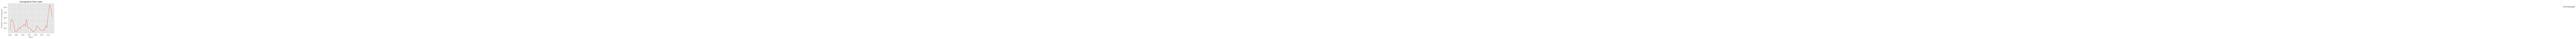

In [41]:
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

# annotate the 2010 Earthquake. 
# syntax: plt.text(x, y, label)
plt.text(2000, 6000, '2010 Earthquake') # see note below

plt.show() data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAASLMAAAEaCAYAAAA2+57LAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjQuMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/MnkTPAAAACXBIWXMAAAsTAAALEwEAmpwYAACyD0lEQVR4nOzUeZSW5Xk/8O/7MrIIMiwzwwxqhRRUQBBcqkYF45bYYGyatqZaDaDRakya2BNjQtqsLjkat7ikKkcMNTFNjNjmqDUoalCJuKBRbFwiRmBghiUgCA46z+8Pk/lBQBxxmNfg53POnHme+76u6/7ez5kzpaIoigAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALxHlCsdAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAYEPlSgcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADYULnSAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADZUrnQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACADZUrHQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGBD5UoHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA2FC50gFgax122GE59dRTK5rh3nvvTalUyoIFCzrlvK985SsZMGBASqVSpk6d2ilndqb2fs+vf/3rGTJkSCelAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA6W6koiqLSIfjzNGHChCxYsCAzZsyoyPnLly9PVVVVevfu3SnnVVVV5frrr8+ECRPa1lpaWrJ8+fLU1dWlXC5v0/N/9atf5cADD8z06dNzwAEHpLq6Oj169NimZ7bHYYcdliFDhuT666/faH3+/PkZPHhwfvnLX+aQQw5p16w//Z6zZs3KoYcemhdffDGDBg1qq1u9enXWrVuXmpqajrwKAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPAeUVXpALC1+vXr965nrF+/PlVVVSmVSlvV37Vr19TX17/rHO3x3HPPpVwu57jjjnvLmnd7n0pr7/fs1atXevXq1QmJAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIBKKFc6ANuPCRMm5Mgjj8z3vve97LLLLunVq1dOPfXUrF+/Pt///vez2267pW/fvjnttNPS0tLS1nfYYYfllFNOyVe/+tXU1dWlT58+mTx5clpbW/PNb34zAwYMSG1tbSZPnrzReYcddlhOPfXUtve1a9fmtNNOS3V1dfr27ZszzzwzX/7ylzNkyJDNZhw0aFC6deuWNWvW5Be/+EUOO+yw9OvXL9XV1Rk3blwefvjhtr5BgwbljTfeyMSJE1MqlVIqlZIk9957b0qlUhYsWNBWO3v27IwdOzY9evRI3759c8IJJ6Spqalt/+tf/3qGDBmS2267LXvuuWd69uyZD33oQ3nhhRe2+G1POumktLa2bnT+W93nN7/5TT760Y+mV69e6dWrV4499tg8//zzbfOmTp2aqqqqzJw5MyNHjkyPHj0ybty4LFq0KPfff3/GjBmTnj175sgjj8zChQvb/TfwdiZPnpxhw4Zlxx13zK677pp//ud/zsqVK9v2N/ye8+fPz6GHHpokGTx4cEqlUg477LCNviEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAsH0qVzoA25c5c+bkkUceyS9+8Yv88Ic/zH/+53/muOOOy4MPPpg77rgj06ZNy7Rp0zJlypSN+n76059m/fr1mTVrVi655JKcf/75GT9+fFavXp1f/vKXufjii3P++efnjjvueMuzv/SlL+W2227LtGnTMnv27FRXV+fqq6/epO7hhx/OPffck+nTp+eJJ55I9+7ds3r16nzmM5/J7Nmz8+CDD2bo0KH5yEc+kmXLlrXdq0uXLrnsssvS2NiYxsbGzWZYvHhxjj766Oyyyy55+OGH8z//8z956qmn8olPfGKjusbGxlxzzTW56aab8uCDD+b3v/99Jk2a9JZ3u/zyy3PZZZelS5cum5z/p/cpiiJHH3101q1bl/vuuy/33XdfVq9enY985CNpaWlp62ttbc03vvGNXH/99XnggQeyaNGiHH/88fn3f//3XHPNNZk1a1YWLFiQs88++y1zvVM9evTItddem3nz5mXq1Km5995787nPfW6ztbvuumtuu+22tjs2NjbmZz/7WYdlAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADeu6oqHYDtS7du3XLdddela9euGTZsWI444oj86le/ysKFC9OtW7cMHz48Rx99dO6+++6cccYZbX2DBw/Od77znSTJ7rvvnu9+97t5+eWXc/vtt7etXXLJJbn77rtzzDHHbHLumjVr8h//8R+5+uqr87GPfSxJcsEFF2TmzJlZunTpRrXlcjnTpk1Lr1692tY+/vGPb1Rz7bXX5pZbbsmdd96ZE088MbW1tUmS6urq1NfXv+X9r7rqqvTu3TtTp05N165dkyTTpk3L6NGjc//992fs2LFJktdeey3Tpk1rm/ulL30pJ5xwQtatW5fu3btvMre6ujrV1dVJssn5f3qfKVOmpLm5OY8++mhqamqSJDfffHMGDRqUm2++OSeffHKSpCiKXHbZZRk9enSS5LTTTss555yTRx55JPvuu2+S5PTTT8955533lvf9oxtvvDE333zzRmtFUWxS99WvfrXtedCgQbngggvyyU9+MjfccEPK5fJGtV26dEm/fv2SJLW1tVv87gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADA9qVc6QBsX4YNG5auXbu2vdfX12ePPfZIt27dNlpramraqG/vvffe6L2+vj6jRo3aZO1P+/7o+eefT0tLSw488MCN1g866KDNZuzVq9dGay+++GJOOumkDBkyJL17907v3r2zcuXKvPTSS1u47aaefvrpHHjggRt9g7333jvV1dV5+umn29YGDhyY2tratvedd945RVG85f225E/v8/TTT2f48OGpqalpWxswYED22GOPjTKUSqWMHDmy7b2+vj5JNvru9fX1WbZsWd54440tZvj4xz+euXPnbvRz++23b1L3s5/9LGPHjs3AgQPTq1evnHjiiWlpacnixYvf8b0BAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgO1XVaUDsH3ZYYcdNnovlUqbXWttbe2Qvj9VKpXeNmPPnj03WRs/fnxqampy1VVXZdddd03Xrl1zyCGHpKWl5W3ntTfDhutdu3bd7N7b3W9zNnefzWUoimKj9XK5nC5dumzSs+F3/+NaURRbzNC7d+8MGTJko7Wqqo3/vfzqV7/K3//93+fLX/5yLrroovTt2zezZ8/Opz71qa36zgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADA9qtc6QDQEYYMGZKuXbvmoYce2mh99uzZb9u7bNmyzJs3L+eee24+/OEPZ/jw4enevXuampo2quvatWveeOONLc4aMWJEHnroobS0tLStPfHEE1m5cmVGjBjxDm609UaMGJGnn346S5cubVtbsmRJnn322U7LsDmzZs1KTU1Nvv3tb+eAAw7I7rvvngULFmyxp2vXrknytt8dAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAANi+lCsdADpCz549c/rpp+erX/1qfv7zn+fZZ5/N5MmT88wzz6RUKm2xt2/fvqmtrc11112XZ599Ng899FD+8R//MT169NiobvDgwZk5c2YWLVqUpUuXbnbWWWedlVWrVmXChAl56qmnMmvWrJx00kk55JBDcuihh3bYfbfkhBNOSG1tbY4//vg89thjefTRR/PJT34yO++8c44//vhOybA5e+yxR5qbmzNlypT89re/zQ9+8INcffXVW+zZbbfdUi6Xc/vtt6epqSkrV67spLQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQCWVKx0AOsp3vvOdHHvssTnhhBPyV3/1V1mxYkUmTJiQ7t27b7GvXC7nJz/5SV544YWMGjUqEyZMyOc///k0NDRsVPfd7343jz76aAYPHpza2trNzhowYEDuuuuuLFiwIPvvv3/Gjx+fvfbaK7fcckuH3fPt9OjRI3fddVe6deuWsWPHZty4cenZs2fuvPPOdO3atdNy/Knx48dn8uTJ+cpXvpKRI0fm5ptvzkUXXbTFngEDBuSCCy7IhRdemIaGhhx33HGdlBYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAqKRSURRFpUPAtnL44Yenb9++ueWWWyodBQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAdqqqdADoKL/+9a/z2GOP5aCDDkpLS0umTZuWmTNn5vbbb690NAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA3oGqSgeAjlIqlXLNNdfkc5/7XFpbW7Pnnnvm1ltvzTHHHFPpaAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAvAOloiiKSocAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD4o3KlAwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGyoXOkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAG6qqdIDOsmjRoq3qq6mpydKlSzs4zbYnd+eSu3P9ueZO/ryyDxw4sNIRAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHifKlc6AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwIbKlQ4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACwoXKlAwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGyoXOkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGypXOgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMCGypUOAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAsKFypQMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABsqFzpAAD8f8WTc1IsXljpGAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABQUeVKBwDgTUVRpPXai9L6w+9XOgoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAVFS50gEA+IOVK5LX1iXPPJFi6ZJKpwEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAiilXOgAAf9C8uO2xePDuCgYBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgMoqVzoAAG8qmhrffKgbmOKBu1O0tlY2EAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABUSLnSAQD4g+bGpFxOafzxyfLm5P+erHQiAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKiIcqUDAPAHzYuTfrUp7XdwsmOvFA/MqHQiAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKiIcqUDAPCmoqkxqWtIaYeuKR0wLsVjD6VYs7rSsQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACg05UrHQCAP2henFJtfZKkdMiRyevrUzx8f4VDAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEDnK1c6AABJsWZ1suaVpLYhSVL6i79Mdh2c4oEZFU4GAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJ2vXOkAACRpbkySlOoa2pZKBx+VvPR8igUvVioVAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFREudIBAEiK5sVvPtTWt62VDhibVFWleODuCqUCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgMooVzoAAEmaGt/8XVvftlTq1Tul0QemmD0zxevrKxQMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADpfudIBAEjS3JhU90upW/eNlksHH5msfiV5Yk6FggEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADw8ssv50Mf+lCGDRuWESNG5PLLL2/bW758eY466qgMHTo0Rx11VFasWJEkWbZsWT70oQ+lV69eOeusszaa9+ijj2bkyJEZMmRIPve5z6Uoik3OnDp1amprazN69Oi2n3nz5r2j3Oeff37b8/z587PXXnu9o/6tMWjQoCxduvRdzyl3QBYA3qWieXFSW7/pxvC9k741aX1gRueHAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACBJUlVVle9+97t55plnMnv27Fx11VWZN29ekuTCCy/MEUcckeeeey5HHHFELrzwwiRJ9+7d861vfSsXX3zxJvPOOOOMXHvttXnuuefy3HPP5c4779zsuccff3zmzp3b9jN8+PB25S2KIq2trTn//PO38saVV650AACSNDWmVFu/yXKp3CWlDx6ePPVYihXLKhAMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgIaGhuyzzz5Jkp122inDhg3LwoULkyS33XZbPvWpTyVJPvWpT2X69OlJkp49e+aQQw5J9+7dN5rV2NiYVatW5aCDDkqpVMrJJ5/c1tMeq1evzhFHHJF99tknI0eOzG233ZYkmT9/foYNG5Yzzzwz++yzT0455ZSsXbs2o0ePzoknnpgkeeONN/LpT386I0aMyNFHH521a9cmSR599NHsvffeOeigg/LFL34xe+21V5Jk6tSpOeuss9rOHj9+fO69994kyRlnnJH99tsvI0aMyNe+9rVNcq5duzYf+chHct1112XNmjWZNGlS9t9//4wZM6Yt85aU2/1FANgmipbXkt8vT+oaNrtf+uARSdGa4qF7OjkZAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAH9q/vz5efzxx3PAAQckSZYsWZKGhoYkSUNDQ5qamrbYv3Dhwuyyyy5t77vssksWLly42dof//jHGT16dNvP2rVr071799x666157LHHMnPmzPzrv/5riqJIkvzmN7/JySefnMcffzw33HBDevTokblz5+amm25Kkjz33HP5zGc+k6effjp9+vTJLbfckiSZOHFirrjiijz00EPt/g7nnXdeHnnkkTz55JO577778uSTT7btrV69Oscee2xOOOGEfPrTn855552Xww8/PHPmzMnMmTPzxS9+MWvWrNni/Kp2J3mX1qxZk+9///t5+eWXUyqVcsYZZ2TgwIG59NJL09zcnNra2nzhC19Ir169kiS33npr7rnnnpTL5UycODGjR49Okvz2t7/NVVddlZaWlowZMyYTJ05MqVTqrGsAdLzmJW/+rq3f7HapriHZfa8UD8xIcczf+Z8HAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAUCGrV6/OJz7xiVx22WXp3bv3Vs0oimKTtVKptNna448/PldeeeVGa+vXr89XvvKV3H///SmXy1m4cGGWLFmSJNltt91y4IEHvuXZgwcPzujRo5Mk++67b+bPn5+VK1fm97//fcaNG5ckOemkk3LHHXe87T3+67/+K9dee21ef/31NDY2Zt68eRk1alSS5Ljjjss555yTE088MUly11135b//+79z8cUXJ0nWrVuX3/3udxk2bNhbzi+/bYIOcsMNN2T06NG57LLLctFFF2XnnXfO9OnTM3LkyFxxxRUZOXJkpk+fniRZsGBBHnzwwVxyySWZPHlypkyZktbW1iTJddddl9NPPz1XXHFFFi9enLlz53bWFQC2jeZFSZJSXcNblpQOPjJpakyem9dZqQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADYwPr16/OJT3wiJ554Yv72b/+2bX3AgAFpbGxMkjQ2Nqaurm6Lc3bZZZcsWLCg7X3BggUZOHBgu3PcdNNNaW5uzqOPPpq5c+dmwIABWbduXZKkZ8+eW+zt1q1b23OXLl3y+uuvpyiKlEqlzdZXVVWltbW17f2P57z44ou5+OKLc/fdd+fJJ5/MRz/60ba9JDn44INzxx13pCiKJElRFLnlllsyd+7czJ07N7/73e8ybNiwLWYtb3G3g7z66qt55plncvjhhyd588I9e/bMnDlzMm7cuCTJuHHjMmfOnCTJnDlz8sEPfjA77LBD6urqUl9fn+effz4rVqzI2rVrs/vuu6dUKmXs2LFtPQB/roqmxW8+1DW8ZU1p3w8m3XukeGBGJ6UCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4I+Kosgpp5ySYcOG5eyzz95o72Mf+1huvPHGJMmNN96Y4447bouzGhoastNOO2X27NkpiiI/+MEP3rZnQytXrkxdXV122GGHzJw5My+99NJb1u6www5Zv379Fuf16dMn1dXVmTVrVpLkpptuatsbNGhQ5s6dm9bW1rz88st5+OGHkySrVq1Kz549U11dnSVLluSOO+7YaOY3v/nN9O/fP2eeeWaS5MMf/nC+973vpSiKJMnjjz/+tvesetuKDtDU1JTevXvn6quvzksvvZQPfOADmTBhQlauXJm+ffsmSfr27ZtVq1YlSZYvX56hQ4e29ffr1y/Lly9Ply5d0r9//7b1/v37Z/ny5Zs9c8aMGZkxY0aS5MILL0xNTc1WZa+qqtrq3kqSu3PJ3bn+XHMnm8++6pUVWddzp9TuNniLvasOPSpr778r/c46N+UePbdlTAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA28MADD2TatGkZOXJkRo8enSQ5//zz89d//dc599xz8w//8A+ZMmVK/uIv/iI/+clP2voGDRqUVatWpaWlJdOnT89dd92V4cOH55prrsmECROydu3aHHPMMTnmmGM2e+6Pf/zjzJo1q+396quvzoknnphjjz02++23X0aPHp0999zzLXOfdtppGTVqVPbZZ5+cd955b1l3ww03ZNKkSdlxxx3z4Q9/uG394IMPzuDBgzNy5Mjstdde2WeffZIke++9d8aMGZMRI0bkAx/4QA4++OBNZl522WWZNGlSzjnnnHzjG9/I5z//+YwaNSpFUWTQoEH5+c9//pZ5kqRUFEWxxYoO8MILL2Ty5Mn51re+laFDh+aGG25Ijx49cuedd2bq1KltdRMnTswNN9yQ66+/PrvvvnvGjh2bJLnmmmsyZsyY1NTU5Ec/+lH+7d/+LUnyzDPP5Lbbbsu55577thkWLVq0VdlramqydOnSreqtJLk7l9yd6881d7L57G9c+rVkzSvp8tVLtthbvPB/ab3wnJROPivlQ4/eljGTJAMHDtzmZwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADw3jJ//vyMHz8+Tz31VEVzlDvjkP79+6d///4ZOnRokuTAAw/Miy++mOrq6qxYsSJJsmLFivTu3butftmyZW39y5cvT79+/TZZX7ZsWfr169cZVwDYdpobU6prePu6D+yRNOya4oEZ2z4TAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFRQuTMO6dOnT/r3759FixYlSX79619nl112yX777Zf77rsvSXLfffdl//33T5Lst99+efDBB7N+/fo0NTWlsbExQ4YMSd++fdOjR488++yzKYoi999/f/bbb7/OuALANlG8/nqyrCmprX/b2lKplNLBRyYv/F+KxgWdkA4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACA95tBgwblqaeeqnSMVHXWQZMmTcoVV1yR119/PXV1dTnzzDNTFEUuvfTS3HPPPampqcnZZ5+dJNl1111z0EEH5eyzz065XM4pp5yScrmcJDn11FNz9dVXp6WlJaNHj86YMWM66woAHW95c9LamtQ1tKu8dNBhKX52Y4oHZqT0dxO2bTYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAqJBSURRFpUN0hkWLFm1VX01NTZYuXdrBabY9uTuX3J3rzzV3smn24unH03rZ11L+4vkp7b5Xu2a8cfnXk2XN6fLNq7ZRyjcNHDhwm84HAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgLdSrnQAgPezoqnxzYfahnb3lHbeLWluTNH6xjZKBQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACVVa50AID3tebGpGvXpLpv+3vqBiavv56sWL7tcgEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABABZUrHQDg/axoXpzU1KdUbv+/41Jdw5sPTYu2USoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAqKxypQMAvK81NSa19e+sp64hSVI0NW6DQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABQeeVKBwB4vypaW5Oli1Oqa3hnjX36Jzt0TZoat00wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKiwcqUDALxvrVyRtLQktQ3vqK1ULie19SmaGrdRMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACorHKlAwC8bzU3JklKdQ3vvLeuIWla1MGBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOC9obw1TS0tLXn99dc7OgvA+0rRvPjNh9r6d9xbqmtImhenaG3t4FQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAUHnl9hT94Ac/yPPPP58keeyxxzJx4sRMmDAhjzzyyDYNB7Bda2pMyuWkX+07761tSNa3JL9f3vG5AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKDCyu0pmjVrVnbdddckyU9/+tN89rOfzTnnnJMf/ehH2zQcwHateXHSvy6lqqp33FoaMPAPMxo7OBQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAVF5Ve4pee+21dOvWLa+88kqWLFmSAw88MEmydOnSbRoOYHtWNDUmtQ1b11z3Zl+xZFFKe4zswFQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAUHlV7SkaOHBgfvnLX2bx4sUZNWpUkmTVqlXp2rXrNg0HsF1rbkxp8NCt6+3bP6mqSpoaOzYTAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALwHlNtTdMopp+R///d/8/TTT+f4449PkjzxxBMZNWrUNg0HsL0q1rySvLomqW3Yqv5SuUtSU5+iubGDkwEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABA5VW1p6impibf/va3N1o79NBDM3LkyG0SCmC719SYJCnV1W/9jAEDkyWLOigQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALx3lNtT9C//8i+bXf/CF77QoWEA3i+KpsY3H2obtnpGqbYhaW5MURQdlAoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA3hvK7SkqimKTtVdffTXlcrvaAfhTzYvf/F1Tv/Uz6hqSlpZk5fKOyQQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA7xFVW9o844wzkiQtLS1tz3+0evXqHHzwwdsuGcD2rKkx6dMvpW7dtnpEqa4hRdus/h0WDQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAqrWpLm5/97GdTFEUuuOCCfPazn91or0+fPhk4cOA2DQewvSqaFyd1De9uyB/6iyWLUtp9rw5IBQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADvDVVb2hw+fHiSZMqUKenWrVunBAJ4X2henNJeY97djH61SZeqpLmxYzIBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwHtEVXuKunTpkhkzZmT+/PlZt27dRntnnXXWNgkGsL0qXluXrFye1Da8qzmlLl2SmgEpmho7KBkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAvDdUtafoyiuvzEsvvZR999031dXV2zoTwPatefGbv+sa3v2suoakqfHdzwEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACA95Cq9hQ98cQTufLKK9OzZ89tnQdg+9fUmCQp1da/61GluoYUzz6VoihSKpXe9TwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAeC8ot6eopqYm69ev39ZZAN4XiubFbz7UNrz7YXUNyWvrklW/f/ezAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOA9oqo9RWPHjs1FF12UY445Jn369Nlob6+99toWuQC2X82NSc+dUurZ612PKtU1pEiSpsakuu+7ngcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA7wVV7Sm68847kyQ/+tGPNlovlUq58sorOz4VwHasaGpMaus7ZlhdQ9vM0tDhHTMTAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACqsqj1FV1111bbOAfD+0bw4pcG7d8ys/gOSLl2SpkUdMw8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA3gPKlQ4A8H5SrF+fLGtO6ho6ZF6pS5ekf13S1Ngh8wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADgvaCqPUWvvvpqfvKTn2TevHl55ZVXUhRF294111yzzcIBbG/eaF6cFK1JbUPHDa1rSNHU2HHzAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKDCyu0puv766/Piiy/m7/7u77J69epMmjQpNTU1+ehHP7qt8wFsV95YvDBJUqqt77CZpdqGpLkxRVF02EwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAqKSq9hQ9+eSTufTSS7PTTjulXC5n//33z1/+5V/mO9/5TsaPH9+ugz7zmc+ke/fuKZfL6dKlSy688MKsXr06l156aZqbm1NbW5svfOEL6dWrV5Lk1ltvzT333JNyuZyJEydm9OjRSZLf/va3ueqqq9LS0pIxY8Zk4sSJKZVKW3d7gE72xuKFbz7UNXTc0AEDk7WvJq+sTHr36bi5AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFAhVe0pKooiO+64Y5Kke/fuWbNmTfr06ZPFixe/o8O+9rWvpXfv3m3v06dPz8iRI/M3f/M3mT59eqZPn55/+qd/yoIFC/Lggw/mkksuyYoVK/Ktb30rl19+ecrlcq677rqcfvrpGTp0aC644ILMnTs3Y8aMeUc5ACrljcULkq7dkuq+HTazVNeQIkmaGpPefTpsLgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABUSrk9RbvttlvmzZuXJNlzzz0zZcqUXH/99WloaHhXh8+ZMyfjxo1LkowbNy5z5sxpW//gBz+YHXbYIXV1damvr8/zzz+fFStWZO3atdl9991TKpUyduzYth6APwevL16Y1NanVCp13NDaN/8XF02NHTcTAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACqoqj1Fp59+eoqiSJJMmjQpP/zhD7NmzZqcddZZ7+iw8847L0ly1FFH5cgjj8zKlSvTt2/fJEnfvn2zatWqJMny5cszdOjQtr5+/fpl+fLl6dKlS/r379+23r9//yxfvnyzZ82YMSMzZsxIklx44YWpqal5R1n/qKqqaqt7K0nuziV35/pzzZ0kyxYvTLdddkufDsxfVFenqVzOjqv/Hzv1HmV3WeYL/vvbtSsXCXVNFUkIieZmQNBEE1ouEoRMy/RZ08eVcbSPh2ll8DasGW3jHHWNCou2XXhAQNBI99igi+4ZG3Up7fLY2kLaRAntoZWcbm1bLhFDILFCXZOQUCH1mz+qO6fTJLBJatfOLj6ftWq9b73v8z7Pd+/KynBmNen3AgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD/WvWFCsbGxvKDH/wg69atS5K0tbXlfe9734se9MlPfjJdXV0ZHh7OH/3RH2XevHnHrC3L8kWdH83atWuzdu3aw78/9dRTtYf9V2bPnn3cbxtJ7skl9+Rq1tzl2FjGdj2RQ2e+ZuLzd/fm6cceyYEJ7Pt8/08DAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQD1VXrCgUsn3vve9tLS0nNCgrq6uJEl7e3tWr16dRx55JO3t7RkcHEySDA4Opq2tLUnS3d2d/v7+w28HBgbS1dX1nPP+/v7DfQFOekMDycHRpGfuxPfumZuyb+fE9wUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACABqjUUrRmzZp8//vfP+4hBw4cyP79+w/v//7v/z4LFizIqlWrsmnTpiTJpk2bsnr16iTJqlWrsmXLlhw8eDB9fX3ZuXNnlixZks7OzsycOTMPPfRQyrLM5s2bs2rVquPOBTCpdu9MkhS9cya8ddE7N+nbmbIsJ7w3AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEy2ai1FjzzySL773e/mW9/6Vrq7u1MUxeG7a6+99gXfDw8P5zOf+UyS5NChQ7nwwguzYsWKLF68ODfffHM2btyY2bNnZ/369UmSM844I+edd17Wr1+fSqWSK6+8MpVKJUnyrne9K1/4whcyOjqaFStWZOXKlS/6QwM0Qtm3c3zTM3fim/fOTfbvS/btSWa1TXx/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJhE1VqKLr300lx66aXHPeS0007LDTfc8JzzU089NVdfffVR36xbty7r1q17zvnixYtz4403HncWgIbZvStpaUm6eia8ddE7L2WS/ObJZFbbhPcHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgMlUraXo4osvrnMMgJeAvp1p6Z2btLRMfO/euUmScvfOFIuXT3x/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJhE1VqKNm7ceNTz1tbWdHd3Z+nSpWltbZ3QYABTTbl7V1rmnJ5D9Wg++7SkKJK+nfXoDgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACTqlpL0ebNm/PQQw+lvb093d3d6e/vz/DwcBYvXpy+vr4kyYc//OEsXry4rmEBmlVZlsnunWl51YocqkP/orU16epJ+nbWoTsAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAATK5qLUXz58/Pueeem9/5nd85fPbd7343TzzxRP7wD/8w3/jGN3LHHXfkU5/6VN2CAjS1vXuS/U+nZc7p9ZvROzdl38769QcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACASVKppei+++7LZZdddsTZb//2b+dHP/pRiqLI7/7u72bHjh11CQgwJQw+lSRp6TmtbiOK3rlJ38669QcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAyVKppai9vT0/+clPjjj76U9/mra2tiTJwYMHU61WJz4dwFQxMpgkqXR0129G79xk356U+/bUbwYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAATIJqLUVXXHFFbrrppixYsCDd3d3p7+/P9u3bs379+iTJww8/nMsuu6yuQQGaWTkylCSpdHTVbUbROzdlkvTtSl5xat3mAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEC9VWspes1rXpPPfe5z2bp1awYGBrJy5cq89rWvzamnnnr4/jWveU1dgwI0tZGhJEmloyvZ93R9ZvTOS5KUfU+meMXS+swAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgElQrbWwra0tF110UT2zAExdw0PJtOmpzHxZsu/p+szomZMURdK3sz79AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGCSVI918alPfSof+9jHkiRXX311iqI4at21115bn2QAU8nIUNLWUdcRReu0pLM76dtZ1zkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAUG/VY12sWbPm8P6SSy6ZlDAAU1W5Zyhp76z/oJ65KXfvrP8cAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKij6rEuLrzwwsP7iy++eDKyAExdw4NJ77y6jylOm5fyp/fXfQ4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA1FO11sJf/OIX+dWvfpUDBw4ccb5u3boJDwUw5YwMpVh6Vv3n9M5N9o6kfHpvipfNqv88AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKiDai1Fd9xxR+6///4sX74806ZNO3xeFEXdggFMFeWzzyZ7R5K2jrrPKnrmpkyS3buShUvqPg8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA6qFaS9EPf/jD3Hjjjenq6qp3HoCpZ+/w+NrWUf9ZvXOTJGXfzhQLl9R/HgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADUQaWWotmzZ6e1tbXeWQCmppGhJEnR1ln/WT1zx9ffPFn/WQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABQJ9Vait73vvflT/7kT3LBBRekvb39iLuzzjqrLsEApozhofG1raPuo4rp05OO7qRvZ91nAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEC9VGsp2rZtWx588MH84he/yLRp0464u+222+oSDGCqKEeGxjdtHZMzsHduyt07J2cWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAANRBtZair3zlK/nIRz6SV7/61fXOAzD1jAyNr20dkzKu6J2b8u8fmJRZAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFAPlVqKpk+fnrPOOqveWQCmppHBZPqMFDNmTs683nnJyFDK/U9PzjwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAmGCVWore9ra35ctf/nKGhoYyNjZ2xA8AL2BkKGnrmLRxRe/c8c3unZM2EwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAmUrWWottuuy1J8v3vf/85d3fdddfEJgKYYsqRoaStY/IG9s4dX/t2JgsWT95cAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJgg1VqKPv/5z9c7B8DUNTyYzDl98ub1zEmSlH07U0zeVAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACYMNVainp6euqdA2Dq2jOUYtmrJm1cMWNm0t6V9D05aTMBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAYCJVayl6+umn853vfCePPfZYDhw4cMTdxz/+8boEA5gKymefTfbuSdo6J3dw75yUfTsndyYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAATJBqLUU33XRTxsbGcu6552batGn1zgQwdewZHl/bOiZ1bNE7N+XPHpzUmQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwUaq1FD388MO5/fbbU63WVA7AvxgZSpIUbR2TO7dnbjJ8b8pnDqSYPmNyZwMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADACarWUrR8+fI88cQTWbhwYb3zAEwtI4Pja3vnpI4tXv/GFK9amVRbJ3UuAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEyEai1FV111Va677rosWbIkHR0dR9y95S1vqUcugCmhHBka37R1TOrcorsn6e6Z1JkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMFGqtRR95StfSX9/f3p6erJ///7D50VRvKhhY2Nj+ehHP5qurq589KMfzd69e3PzzTdn9+7d6enpyQc/+MHMmjUrSfLNb34zGzduTKVSyRVXXJEVK1YkSbZt25YNGzZkdHQ0K1euzBVXXPGicwBMmpGh8bWto5EpAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKCpVGsp2rJlS2655ZZ0dnae0LDvfOc7Of3007N///4kyd13351zzjknb37zm3P33Xfn7rvvzuWXX54dO3Zky5YtuemmmzI4OJhPfvKTueWWW1KpVPLFL34x733ve7N06dJcd9112bp1a1auXHlCuQDqZngwmT4zxfQZjU4CAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAE2jUkvRaaedlpaWlhMa1N/fn5/+9Ke59NJLD5898MADWbNmTZJkzZo1eeCBBw6fn3/++WltbU1vb2/mzJmTRx55JIODg9m/f3+WLVuWoihy0UUXHX4DcFIaGUra2hudAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACaSrWWoje84Q25/vrrc9lll6Wjo+OIu7PPPrumQV/+8pdz+eWXZ//+/YfPhoeH09nZmSTp7OzMyMhIkmRgYCBLly49XNfV1ZWBgYG0tLSku7v78Hl3d3cGBgaOOu+ee+7JPffckyT59Kc/ndmzZ9eU89+qVqvH/baR5J5cck+uZso9sH9f0t2brn/O20zZAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKBRqrUUfe9730uSfOUrXznivCiKfP7zn3/B9z/5yU/S3t6eRYsW5ec///kL1pdl+aLOj2bt2rVZu3bt4d+feuqpmt/+a7Nnzz7ut40k9+SSe3I1U+5D/buTufMP522m7PPmzWt0BAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABeoqq1FG3YsOGEhvzyl7/M3/3d3+XBBx/M6Oho9u/fn1tvvTXt7e0ZHBxMZ2dnBgcH09bWliTp7u5Of3//4fcDAwPp6up6znl/f3+6urpOKBtAXY0MpXjl2Y1OAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABNpTIZQ97+9rfnj//4j7Nhw4b8wR/8Qc4+++y8//3vz6pVq7Jp06YkyaZNm7J69eokyapVq7Jly5YcPHgwfX192blzZ5YsWZLOzs7MnDkzDz30UMqyzObNm7Nq1arJ+AgAL1r57MFk356krbPRUQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACgqVSf7/Lqq69OURTP2+Daa6897uFvfvObc/PNN2fjxo2ZPXt21q9fnyQ544wzct5552X9+vWpVCq58sorU6lUkiTvete78oUvfCGjo6NZsWJFVq5cedzzAepqZHh8betoaAwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAaDbV57u85JJLJnzgq171qrzqVa9Kkpx66qm5+uqrj1q3bt26rFu37jnnixcvzo033jjhuQAm3J6hJEnR1tHQGAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADQbKrPd3nxxRdPUgyAKWhkaHxt62hkCgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABoOpVGBwCYqsrhwfFNW0dDcwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAs6k0OgDAlDUyNL62dTY0BgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA0m0qjAwBMWSNDyYyZKaZPb3QSAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGgqlWNdfOxjHzu8/9rXvjYpYQCmlJGhpK2j0SkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAoOlUjnXx5JNPZnR0NEny7W9/e9ICNZvyp1sy9uVbUu7b0+gowEmmHBlK2joaHQMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAmk71WBerV6/OBz7wgfT29mZ0dDTXXHPNUeuuvfbauoVrBmP3/yDZ+rcpf/mzVK76v1Oc8YpGR6JG5bZfJt29Kdo7Gx2FqWp4MJm3oNEpAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKDpVI91cdVVV+Wf/umf0tfXl0ceeSRvfOMbJzNX8xjoS+aekex/OmOf/k8p3vH+VM69qNGpeAHloUMZu+kTKc57Y4r/+L83Og5T1chQiuWvbnQKAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGg61ee7XL58eZYvX55nn302F1988SRFajIDu1O87oIU/9N/yNgf/+eUX/xMxn79aIp1v5+ipaXR6TiWXTuSZw6kfHJ7o5MwRZUHDyZP703aOxodBQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACaTrWWoksuuSQ/+9nPsnnz5gwODqazszMXXXRRzj777HrnO6mVzxxI9u5JuntTtHem8qFPpvzq7Sn/+pspH9+Wynv+U4pZbY2OyVGUv350fLNzR2ODMHXtGRpf2zoamQIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAmlKllqJ77703n/3sZ9PR0ZFzzz03nZ2dueWWW3LPPffUO9/Jrb9vfO3qSZIU1dZU3v6+FO98f/LwP2bsj9an3L6tgQE5psf/+e+yZzjlvj2NzcLUNDKUJCnaOhoaAwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACaUbWWom9961v5+Mc/npe//OWHz84///zceOONWbt2bb2ynfwGdidJiu6eI44rF6xNOW9hxm67LmP/+cMpfv//TOW31jQiIcdQbn80qVSSsbFk545kyZmNjsRUMzI0vrZ1NjQGAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADSjSi1Fe/bsyfz58484mzdvXvbu3VuXUM2i7N89vunqfc5d8YqlqXz8xuTlS1P+6Y0Z+9qXUpblJCfkaMqxseTxXyVnvmb89107GpyIqagcHhzftHU0NAcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAANKNKLUXLly/PnXfemWeeeSZJcuDAgfzZn/1Zli1bVtdwJ73+vqSlJenoPOp10daZygc/meKiy1L+9TeTh34+yQE5qqd2JfufTrHyvKTamuza0ehETEUjQ+NrW0cjUwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAU6rWUvTud787n/3sZ/POd74zs2bNyt69e7Ns2bJ84AMfqHe+k1v/7qSjO0Wl5ZglRbWavPXKlP91U8r77knxyrMnMSBHtX1bkqR4+ZKUp81LueuJBgdiStoznMx8WYpp0xudBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACaTrWWos7Ozlx77bXp7+/P4OBgOjs7093dXe9sJ71yYHfS3fuCdcX06SlWvyHljzelfPt7Usx42SSk41jK7Y8mLS3JvIUp5sxP+fivGh2JqWh4MDm1o9EpAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKApVV5McXd3d5YsWZLu7u565WkuA30puntqKi0uWJuMPpPygR/VORQvpNy+LZm7IEVrazJ3fvLUrpQHDzY6FlNMOTKUtHU0OgYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAANKVKowM0q/LZZ5PBgaSrp7YHi16ZzJmfcsu99Q3G8yrLMtm+LcXCReMHc+YnY2PJ7p2NDcbUMzKUtHc0OgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAANKVKowM0reGBpBxLuntrKi+KIsUFlyaP/CLlrh11DscxDQ0ke4aTMxYnSYo588fP/U2YaCODKdo6Gp0CAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJpS5YUKxsbG8rOf/SzPPvvsZORpHv19SZKiu6fmJ8Xr35hUKim33FuvVLyQ7Y8mSYqFi8Z/P21ekqTcuaNRiZiCyoMHk6f3JW0djY4CAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAE2p8oIFlUquv/76VKvVycjTNMr+3eObrt6a3xQdXcnZr0u55W9SHjpUp2Q8n3L7tqQokvmvSJIUM2YmXbOTXU80OBlTysjQ+NrW2dAYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAANCsKrUUnXnmmXnooYfqnaW5DOweX7tmv6hnlQvWJsMDyT8+WIdQvJBy+6PJafNSzJj53w/nzE+5a0fjQjH1jAwlSYq2jobGAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIBmVa2lqKenJ9ddd11WrVqV7u7uFEVx+O5tb3tb3cKd1Pr7klPbU0yb/uLevXpVMqstYz+6Jy3nrKpPNo5t+6Mplpx1xFExZ37KLfemLMsj/m3DcRsZGl/bOxsaAwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACaVbWWotHR0axevTpJMjAwUNdAzaLs3510977od0W1NcXr35jyb/5Lyj0jKU5tq0M6jqbcM5IMPJUsWHTkxZz5yYH9yfBA0tHdmHBMKeXI4PimraOhOQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACgWVVrKbrqqqvqnaP5DPQl8xYe19PigktT3vOXKX/8gxRrf3eCg3FMjz+aJCkWLD7iuJhzesok2bkj6eie/FxMPSND42tbRyNTAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEDTqtRauGPHjnz961/P7bffniR58skn8+tf/7puwU5mZVkmA7tTdPcc1/ti/suThUtS3nfPeC8mRbl92/hmwaIjL+bOH7/f9cQkJ2LKGhlKZp6SonVao5MAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQFOq1FJ0//3355prrsnAwEA2b96cJNm/f3/uvPPOuoY7ae0dSUZHk+7e425RXLA22fFYsn3bxOXi+W3flnT3pjjl1CPP27uSGTOTXTsak4upZ3gwaetodAoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAaFqVWoq++tWv5hOf+ETe8573pFIZf7Jw4cI89thj9cx28urvS5IUXT3H3aI496Kk2pryvnsmKhUvoNy+LTlj0XPOi6JI5sxPuWtHA1IxFZV7hpK29kbHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAICmVamlaHh4OAsXLjzirCiKFEVRl1AnvYHd42t3z3G3KE6ZlWLl61P+eFPKg6MTFIxjKQ88nfzmiRQLFx31vpgzP9m1Y5JTMWWNDKVo62x0CgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABoWtVaihYtWpTNmzdnzZo1h8/uu+++LFmypKYho6Ojueaaa/Lss8/m0KFDef3rX5+3vvWt2bt3b26++ebs3r07PT09+eAHP5hZs2YlSb75zW9m48aNqVQqueKKK7JixYokybZt27Jhw4aMjo5m5cqVueKKK1IUxYv82Cem7N89vunuPaE+xYVrUz7ww5Rb/2uK1RdOQDKO6fHHkiTFGYuPfj/n9ORv/yblgf0pZsycvFxMTcNDyZkdjU4BAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAE2rUkvRFVdckb/4i7/INddck2eeeSaf+tSnctddd+Ud73hHTUNaW1tzzTXX5IYbbsj111+frVu35qGHHsrdd9+dc845J7feemvOOeec3H333UmSHTt2ZMuWLbnpppvysY99LLfffnvGxsaSJF/84hfz3ve+N7feemt27dqVrVu3HtcHPyH9fcn0mcnLZp1Yn+WvTrpmp7zv+xOTi2Mqtz86vlm46Kj3xdz545vfPDlJiZiqyoOjyf59SVtHo6MAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQNOq1FJ0+umn57Of/Wze9KY35fd+7/dy8cUX58Ybb8zcuXNrGlIURWbMmJEkOXToUA4dOpSiKPLAAw9kzZo1SZI1a9bkgQceSJI88MADOf/889Pa2pre3t7MmTMnjzzySAYHB7N///4sW7YsRVHkoosuOvxmMpX9u5Ou2SmK4oT6FJWWFOddkvzj1pQDuycoHUe1fVtyanvS3nX0+znzkyTlrh2TGIopaWR4fG3vbGwOAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGhi1VoLp0+fnuXLl2dgYCBdXV2ZMWPGixo0NjaWj3zkI9m1a1fe9KY3ZenSpRkeHk5nZ2eSpLOzMyMjI0mSgYGBLF269PDbrq6uDAwMpKWlJd3d3YfPu7u7MzAwcNR599xzT+65554kyac//enMnj37ReX9F9Vq9Tlv+0cGU5k7P53H2fNfe/bfvSX9/+WrmfnffpxZ/8s7T7jfvzha7mZQr9z9T/46lSVnprOn56j3ZXtb+iotednwQGYdx3zf9+Q6mXMfHOjLQJL2+Qsy/SgZT+bsAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHCyqNZS9NRTT+XWW2/Nww8/nFNOOSX79u3LkiVL8v73vz89PT01DapUKrnhhhuyb9++fOYzn8n27duPWVuW5Ys6P5q1a9dm7dq1R3yG4zF79uznvD3U92SKM15x3D2P0DojWXZ29n3/W9l/8b9LURQn3jNHz90M6pG7PDiascd/leLMFc/fe/ZpeXrbQzlwHPN935PrZM5dPv5YkmQklRRHyXgyZ/+35s2b1+gIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALxEVWop2rBhQxYtWpQvfelL+dM//dN86UtfyuLFi7Nhw4YXPfCUU07JWWedla1bt6a9vT2Dg4NJksHBwbS1tSVJuru709/ff/jNwMBAurq6nnPe39+frq6uF53hRJTPHEj27km6eiasZ3HB2mT3ruThn09YT/6VJ36dHDqUYuHi56+bOz/lrh2Tk4kpqxwe/z8tbZ2NDQIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAATaxSS9G2bdty+eWXZ8aMGUmSGTNm5PLLL8+2bdtqGjIyMpJ9+/YlSUZHR/MP//APOf3007Nq1aps2rQpSbJp06asXr06SbJq1aps2bIlBw8eTF9fX3bu3JklS5aks7MzM2fOzEMPPZSyLLN58+asWrXqRX/oEzKwe3zt7p2wlsXrzk9mzEx5370T1pP/rtz+z/9OFyx+3rpizunJb55MOXZoElIxZY0Mja9t7Q2NAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADNrFpL0dKlS/PII49k+fLlh88effTRLFu2rKYhg4OD2bBhQ8bGxlKWZc4777y87nWvy7Jly3LzzTdn48aNmT17dtavX58kOeOMM3Leeedl/fr1qVQqufLKK1OpVJIk73rXu/KFL3who6OjWbFiRVauXPliP/OJ6e9LkhTdPRPWspg+I8XqN6T88aaU/+HdKWa8bMJ6k2T7o8nMU5LZpz1/3Zz5ybMHk/7dSc+cycnG1DMylMw8JUXrtEYnAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAICmVT3WxV133XV4f9ppp+W6667La1/72nR3d6e/vz8PPvhgLrzwwpqGLFy4MNdff/1zzk899dRcffXVR32zbt26rFu37jnnixcvzo033ljT3Hoo+3ePb7p6J7Rvcd4lKX/41yn/4acpVtf2vb5UlWNjKSqV2uu3b0sWLEpRFM9bV8yZnzJJdu1IeuacWEhessqRwaS9o9ExAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKCpVY510d/ff/jn4MGD+a3f+q20trZmZGQkra2tOffcczM6OjqZWU8OA7uTlpako3Ni+758aVKpJDsem9i+U8zYAz/M2If/t5S7nqipvjx0KNnxWIozFr1w8ZzTx9/s3HEiEXmpGxlK2joanQIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAmlr1WBdXXXXVZOZoHv19SUd3ikrLhLYtWluT3rkpn9w+oX2nknL0mZRf+1IyPJCxr38pLf/Hx1/40a4dycHRZOGiFywtZrUlp7aPv4HjNTKc4oxXNDoFAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADS1aq2FzzzzTHbt2pUDBw4ccf7KV75ywkOdzMr+3Ul3b32az1uQ7Ph1fXpPAeXGbyeDTyUrXp9s/duUv/hvKc58zfO/2b4tSVKcsbi2IXNOT7lrx4lG5aVsZDBpW9noFAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADQ1Kq1FG3atCl33HFHqtVqpk2bdsTdbbfdVpdgJ62BvhTLzqlL62LegpQP/jjlwdEUrdNe+MFLSLlvT8q/+npyzqpU3vN/ZewTV2Xsq3ek8ombUlRajv1w+6PJtGnJnNNrmlPMmZ9y648nKDUvNeXB0WT/00lbR6OjAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEBTq9ZS9Od//uf50Ic+lFe/+tX1znNSKw8dSgYHku6e+gyYtzApx5KdO5IFi+ozo0mVf/X1ZP/Tqaz7X1O0TkvxP78j5f9zQ8r77k3xht8+9rvt25LTX56ipaW2QXPmJ3v+OuXekRSz2iYoPS8ZI0Pja1tHI1MAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQNOr1FJUrVZz1lln1TvLyW+oPynHku7eurQv5i1IkpRPbq9L/2ZVDuxOee+3U7z+jSnmvyJJUqy6MFm8POVf/r8pDzx99HdjY8nj21IsXFzzrGLu/PHNridOODcvQcODSZKirbPBQQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACguVVqKXrb296WO++8MyMjI/XOc3Lr70uSFF099el/2tykpSV58tf16d+kyr/8/5Ikxb//j4fPiqJI5a1XJsODKf/qG0d/+NRvkv1PJ2csqn3YnPnjM3ftOO68vISNDI2vbR2NTAEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAATa9aS9G8efPy1a9+Nd/73veec3fXXXdNeKiTVTmwe3zT3VOX/kW1Nemdl/LJx+vSvxmVOx5Lef/GFP/Dv0/xb773YtErU5y7JuX370550Zuec5/tj47XLVxc+8DunqTamuzacaLReQkqR4bGN+0djYwBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAE2vWkvR5z73uVx00UU5//zzM23atHpnOnn17x5fu3rqNqKYtyDl9kfr1r/ZjH3zz5IZL0vxP77lqPfFut9P+eD9Kb9xZ4p3f+iIu3L7tqSlJZm3sOZ5RaUlOW1eyl1PnFBuXqJGBsfXUzsaGgMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA+P/ZqfN4u+r63v/v7zonkIlMJwkhCUeBMEUhiRJQKoOAQy0qWquioiBVVCqt/KoXrxSnVmx7A+KFXGdba61VyuA8cFFQUQkiICIgQxtCwAwnE2Qi2d/fH7mm8BAww9l7H/D5fDzOY++z1ve7Pq/zZQUAAAAAAAAAAAAAAAAAAAAAAOCJrndbFj3wwAN51atelVJKu3uGtuVLkt3Gpuyya/tmTO1Prr8mdcOGlF3bOOcJoN5+c3LTgpSXvyFl9JhHXVP6JqU874TUb3wp9djjU/be/7/3L7wz2aM/Zdiw7ZpbpkxPvefunWrnD9TqlcnIUdv9zgEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAj9Rsy6Kjjz46V199dbtbhry6fGkyYVJbZ5Rp/Umtyf33tHXOUFdrTes//jkZ15dy7PGPu7b88Z8mY8en9aVPp9a6dX8W3pXylL23f/ge05Nl96c+9NCOpPMHrK5emYwZ3+0MAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHjC692WRXfccUe+9a1v5ZJLLsm4ceMece/9739/O7qGpoGlydT+9s6Y+pQkSb13YcpTZrR31lD28x8nd92W8vq/SNll18ddWoaPSHnpa1M/d2HqdT9MmXtEsnIgWbMq2XOf7Z89ZXrSaiVL72v/f2+eXFatTMaM63YFAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADzh9W7LomOPPTbHHntsu1uGtFprMrAk5aBntnfQ5D2S3t5k8cL2zhnC6ubNaV3yL8kee6Ycvm3vXfmjY1O/9/XU//jn1NmHJQvv2nL9KXtv9/wyZXpqkty/KJnav937eXKpGzYk69emjB3/+xevXpnSv/3vHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADwSL3bsujoo49uc8YTwAOrk40bkwmT2jqm9PQku09LXbywrXOGsvqj7ya/uTfN6e/Zch7boDQ9af7sjWmd9zep37082bw5KSWZvtf2B+w+dUvHfYtStn83TzL14s+kXnt1mg/OTxkz/vEXr16RjP09awAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACA36t3WxZdeeWVj3nvmGOOGbSYIW1gaZKk9E1u+6gytT/1rtvaPmcoquvXpX7li8mMA5NZh27X3nLgrGTWoanfuDiZ/pRk96kpw0dsd0MZPiIZPzG5/97t3vtkVGtNKaXbGV1Ra029aUGy9sHUSz6XcvJfPvbajRuS9euS3cZ2sBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAnpx6t2XRD37wg0f8vnLlytx///054IADcswxx7QlbMhZvmTLZ9+k9s+a2p8s+EHq+nUpw0e0f94Q8uBX/z1ZNZDmLe9KKWW79zevOCWt9/1FcuetKXOP2PGQKdNS71+04/ufJOrK5Wl9+H+kvOBlaZ77J93O6bzf3JsMLEsmTUn90f9NPfKFKXvv/+hrV6/c8jl2fMfyAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAODJqndbFr33ve/9nWtXXnll7r333kEPGqrq8qVbvvRNbvusMrU/NUnuuyfZa7+2zxsq6prVWXvp55PZh6XMmLlDzyhTpqUc/aLU//vV5Cn77HBLmTI99cdXptaaUsoOP+eJrv78J8nyJalf+Hhau45Ic/gx3U7qqPrLG5IkzdvendZH3p/Wv30izbv/MaVpfnfxqhVJkjJmXOcCAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOBJqndHNx599NE59dRTc9JJJw1mz9A1sDTZdXgycnT7Z03tT5LUxQtT9tqv/fM6oPWZ81Nvvj6p9f/9tLZ8th7+fXNSa5qX7dw7VV58YrJmVcqcZ+/4Q/aYnqxfl6waSMb17VTPE1m94dpk8h5J3+TUf/po6vARKc/YiXN9gqm3/DyZNCVl+l4pr3hD6qfPT/3RFSlHPP93F69ZueVzzLhOJgIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADAk1LvtixqtVqP+H3jxo25+uqrM2rUqLZEDUV1+ZJkwqSUUto/bPKUpHdYsnhh+2d1QF14V+qPv5fMnJ0yeWpSStI0Wz5LScr/+96UjJ1zWNZM7d+peWXU6JQ3/fXOPWPK9NQkuW9RMq5vp571RFXXrU1u+0XKscenvPjEtM4/J61P/mOat/9Nysw53c5ru7rpoeS2m1OefXSSpBx2dOpV30695HOpzzg8ZdToR65fvXLLlzHjOxsKAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAE9Cvduy6MQTT/ydaxMmTMhpp5026EFD1vKlSd/kjowqTU+yx/TUxQs7Mq/d6hWXJ7sOT3Pau1JGjn7ctbtOnJg1y5Z1qOxxTJmeJKn335ty4Kwux3TJLT9PNm9KmXVoyvARac54b1r/+O60LvpQmjM/mLLPAd0ubK+7bks2rEuZOSdJUkpJc+Kb0/rbM1O/8oWUE9/8yPWrVm75HDO2s50AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA8CTUuy2LLrzwwkf8vuuuu2bMmDFtCRqyBpakPHXfjo0rU/tTb/9lx+a1S105kHrtD1KOemHKyNHdztl24yYku45I7l/U7ZKuqTdem4zaLdnnwCRJGTU6zTs+kNY/nJXWR9+f5q8/lLLnXl2ubJ/6yxuSpkn2P2jrtdK/d8pRL0z93jdSj3heyvSH/f2rVyYjR6f0Dut4KwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA82TTbsmjSpEmP+BkzZky7u4aUumF98sCapG9S54ZO7U9WLEtd+2DnZrZB/d43ktbmlGNf3O2U7VJKSaZMS71/UbdTuqK2Nqf+4rqUg56Z0tOz9XoZOz7NmR9Mdh2R1vnnpP5mcRcr26v+6oZkr/1SRo56xPVywmuTUaPS+rdPpNb63+tXr0zGju9sJAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA8SfU+3s33v//9j7u5lJJzzjlnUIOGpIGlWz77JndsZJnan5ok992T7HNAx+YOprphQ+pV30xmHZYyeY9u52y3ssf01Ntv7nZGd9x5W/LAmpRZh/7OrdI3Oc07PpDWP747rfP+Js27PpzSN6kLke1TH1yT/OevU45/9e/cK6N2SznhpNTPz09d8IOUQ4/ccmP1imTMuM6GAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMCTVO/j3TziiCMe9frAwEC++c1vZsOGDW2JGnKWL0mSlAmTOjdzan+SpC5emLLPAZ2bO4jqT76XPLgmzfNe0u2UHTNlevKT76euX5cyfES3azqq3vjTpKc3edozHvV+2WN6mr96X1r/6z1pnX9OmnedmzJmXGcj2+lXNya1psyc/ai3yxHPS73626lf/mzqwXO3vB+rV6Y8ZUZnOwEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADgSap5vJvHHHPMI37mzp2bRYsW5atf/WoOPfTQXHDBBZ3q7Ko6sHTLl75JnRs6cfdkl12SxQs7N3MQ1VYr9YrLk6fMSPZ9WrdzdkiZMn3Ll98s7m5IF9Qbr032f3rKiJGPuab075Pm7eckK5am9ZH3pq59oIOF7VVvuSEZMTLZa79HvV+anjSvOS1ZuTz1G1/acnH1ymTMuE4lAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMCTWrMti9auXZsvfvGLOeOMM7Jq1ar8/d//fU477bT09fW1u29oWL406elJxk3o2MjSNMke/amLF3Zs5qD65fXJ/femHPeSlFK6XbNjpkxPktT7F3U5pLPq/fdu+W938KG/d23Zd2aat/7PZPE9aX3kfanr1nagsL1qram33JAccHBKT89jriv7HJDy7Oemfufy1HvuTtavS8aM61gnAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADyZNY93c+PGjbn00kvz9re/Pffee28+8IEP5O1vf3umTJnSqb6hYfmSZFxfStPT0bFl6p7J4oUdnflw9cE1aX39S6kPPrDde1vfvXzLmR3yR20o65DJeySlSe5f1O2Sjqo3XZskKbPmbtP68vRnpDntXcnCO9P6yHtT161tZ177/WZxsnxJyszZv3dp+dOTk2HD0vrMR7ZcGDOujWEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA8Iejebybp59+er72ta/lJS95SV7wghdk1apVufnmmx/x84egLl+a9E3q/OCp/cnKgdQHH+j87CT13z6Retnn0/rU/0ptbd72fYvuTn51Y8oxf5LSO6yNhe1Vhg1LJu2e+l93pm7e9r//ia7euCCZ/tSUibtv854y51lp3vyu5L/uSOuC96WuW9vGwvaqv7ohSVJmzvm9a8vY8SkvPjFZdPfW3wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAndf7eDd32WWXJMl3vvOdR71fSsmFF144+FVDzcDSlP2e3vGxZWp/apIsXpjsO7Ojs+svfpb606uSGQcmN1+fetm/prz89du297tfSXbZNeXIF7S5sv3K/gel/uA7ab3rlJS5R6QcdlTy1H1TSul2WlvUB9ckd9yS8sJXbPfe8oxnp3nzO9P6xD+mdcH70vzV+1KGj2xDZXvVX/48mbh7yuQ9tml9Oeb41B9+N7nvnmTMuPbGAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMAfiN7Hu3nRRRcNypBly5bloosuysqVK1NKyXHHHZcXvehFeeCBB3L++edn6dKlmTRpUt7xjndk9OjRSZJLL700V155ZZqmySmnnJLZs2cnSe66665cdNFF2bhxY+bMmZNTTjklpZRB6Xw0dfOmZOXypG9S22Y8pqn9WxoWL0zZd2bHxtb169L6/Pxkjz3TnPm3qV/8ROo3L07t3zvlkOc8/t5VK1KvvSrlOc9PGbVbh4rbp5x4WsrTn5HWT69Kveqbqf/3q8nkPVIOPSrlsCNTpkzvduKgqr/4WdJqpcw+dIf2l2ccnuZN70zrE/+Q1kfel+av3pcyfOQgV7ZP3bQpue0XKYcetc17Sm9vmtefntaln092n9bGOgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD4w9F0YkhPT09OOumknH/++fm7v/u7fPvb386iRYty2WWX5aCDDspHP/rRHHTQQbnsssuSJIsWLco111yT8847L+95z3vy6U9/Oq1WK0nyyU9+Mqeddlo++tGP5v77788NN9zQ1vbW8qVJq5VMmNTWOY9qwqRk1+HJ4oUdHVsv+3yyYlma1/9FyrBhKa9+c7LPAWl99oLURf/5+Hu//41k8+aUY1/cmdg2K8OGpTzj8PS89d1p5n0u5Q1vT/omp37939P6m7dl89+emdZ3Lsvm5Uu7nTo4brw2GTs+ecqMHX5Eeebhad78ruTu29O64P2p69cOYmCb3X17sn5dytNmb9e2MmNmet75oZThI9rTBQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB/YJpODBk/fnz23nvvJMmIESMybdq0DAwMZMGCBTnqqKOSJEcddVQWLFiQJFmwYEEOP/zwDBs2LJMnT86UKVNyxx13ZMWKFVm3bl3222+/lFJy5JFHbt3TLpuX/SZJUvomt3XOoylNk+yxZ+rihR2bWe+8NfXKr6Uc/ccpMw7c0jFsWJq3nJWMGJXW/A+lPrjm0fdu3JD6/W8mB89NmTKtY82dUkaOTvOc56XnzA+m+YfPpLzy1CRJ/fJnsuzPX5rNZ781rc9dmNaPv5e6fGmXa7df3fRQ6s0/Szl47pZ3byeUZx6e5k1/ndx1W1oXfCB1/dpBqmyvesvPk9IkBxzc7RQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA+IPW2+mBS5Ysyd13350ZM2Zk1apVGT9+fJJk/PjxWb16dZJkYGAg++6779Y9EyZMyMDAQHp6etLX17f1el9fXwYGBh51zhVXXJErrrgiSfLhD384EydO3KHejb/6+Za+GfuldwefsTNW7b1fNl7/4+3u7+3t3e499aGHsvxf/0+aCZPS96Z3pBkx6r9vTpyYje/+cFacfXp6/+mCjDt7XkpPzyP2r/3O5VnzwOqMf8Xrs8sOntWOdHfFxInJjP2TE0/Npnv/Kw/97Jqsv/nneej6H6f+4DupSZpJU7LL02Zn2MzZ2WXm7PRM3TOllG6XP8LDz3vDjQuycv26jD3iuOw6GP8NXnhC1u+2W1ad9770zD834/5mXpoRI3f+uWnfezJw+83JvgdmQv9TB/3Zv/WEeccBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAoIt6Ozls/fr1mTdvXk4++eSMHDnyMdfVWrfr+qM57rjjctxxx239fdmyZdse+jDD7783SbKi9Kbs4DN2RqtvcurKgSz9z7tSRo/Z5n0TJ07c7r+59bUvpt5zd5q/+JsMPLgueXDdIxf0TUl5zWnZ+LkLs/ST56d5xclbb9Va07rsC8mee2XV7nvu8FntSHfX7ToqE19yYh48/HkprVbK4v9Kve2Xaf365qz/2Y+z/vvf2rJuwsQ0p78npX+f7vY+zMPPu3X1d5Nhu2T11L0G713ff1bKn5+Zhz41L0vfe0aaM96bMnzETj+2He9JffCBtH79q5Q/eWVb38En0js+derUbicAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA8Aeq6dSgTZs2Zd68eTniiCNy2GGHJUnGjh2bFStWJElWrFiRMWPGJEn6+vqyfPnyrXsHBgYyYcKE37m+fPnyTJgwoa3drWW/SXYbm7LLrm2d81jK1P4tXxYvbOucet89qV//UsrcI1JmzX3Mdc0Rz0856oWp374krQU/+O8bv7w+ue+elOedkFJKW1uHstI0KdP3SnPs8el5y1lp5n0uzQfnp5x0elKT1v/5cOqDa7qd+Ttqrak3XpvMnJ2y6+C+683cI1L+/P9L7rg1rQv/NvWhhwb1+YPm1puS2kqZObvbJQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADwB6/pxJBaaz72sY9l2rRpOf7447deP+SQQ3LVVVclSa666qrMnTt36/VrrrkmDz30UJYsWZL77rsvM2bMyPjx4zNixIjcfvvtqbXm6quvziGHHNLW9s1L708mTGrrjMc1tT9JUu9d2LYRtdVK63MXJruOSHn1m37v+vLqNyUzDkz9p4+m3nN3kqT13cuTsRNS5j6nbZ1PRKWUlCnT0xz5gjRvPStZuTytT81LbW3udtoj3ftfyfIlKQfPbcvjm7lHpJzyl8ltv9jy3tTaljk7o95yQzJ8RLLXft1OAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIA/eL2dGHLbbbfl6quvTn9/f975zncmSU488cSccMIJOf/883PllVdm4sSJOfPMM5Mke+65Z5797GfnzDPPTNM0OfXUU9M0TZLkz//8zzN//vxs3Lgxs2fPzpw5c9ravnnJ/cnu09o643GNn5iMGJksXti2EfXqbyV3/CrllL9MGTPu964vvcPSvOWstP72zLTmfyjNyX+Z3HJDygmvS+kd1rbOJ7qy134pr35z6ufnp37131Ne+ppuJ21Vb7w2SVIOntu2Gc2zn5vWwNLUyz6fTJyc8rKT2jZre9VaU395fbL/QSm9HfnfIgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADwOHo7MeSAAw7Il770pUe9d8455zzq9Ze//OV5+ctf/jvX99lnn8ybN29Q+x5LrTWtpfenHDi7I/MeTSkl2WPP1MUL2/L8OrAs9T/+OTlwVsqzj9n2rrHj07z1rLT+8d1pfeScZJddUo56YVsan0zKkS9I7r4t9WtfTH3qvimz5nY7KUlSb7w2eeq+KeMmtHVOedGfJcuXpH7jy2n1TUpz5BB5Z5belyxfkvKCl3W7BAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABI0nQ7YEh7YE2ycUPSN6mrGWVqf7J44aA/t9aa1hc+lrRaaU46PaWU7evae/+U17412bQp5VnHpIweM+iNTzallJTXvCXp3yetT5+XumRxt5NSV61I7r49ZdahbZ+19e9/+jNS//Vjqb/4Wdtnbot6yw1JkjJzTndDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAkSdPtgCFtYEmSpPRN7m7H1P7kgdWpq1cO6mPrdT9Kbrw25aWvTZk0ZYee0TzneWne+aGUV546qG1PZmWXXdO89aykadKaf27qhg1d7ak3LdjSNfvQjswrvb1pTntXMu0paX3871P/686OzH089Zc3JH2Tk8l7dDsFAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEjSdDtgSFu+ZMvnhEldzSjT+rd8Wbxw0J5ZH1yT+m8fT54yI+XYF+/Us8p+T0/ZdddBKvvDUCbunuZNf50sXpj6Lxem1tq1lnrjtVve8WlP7djMMnxkmjPOSUaNTut/fyD1t//WuqBu3pzcdlPKzNkppXStAwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD4b023A4ayOrB0y5e+Sd0NmdqfJKmLFw7aI+ul/5I8uCbNG96e0tMzaM9l25WnzUl56WtTf3pV6pVf70pD3bAh+dUNKbMOTSmlo7PLuL40Z7wv2bgxrQven7r2gY7O3+ru25N1a1OeNqc78wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACA39F0O2BIW740ZfiIZNRu3e0YOyEZOSq5d+GgPK7euzD16u+kHP2ilD33GpRnsmPKH78imXVo6pc/nfrrWzo+f+NN1yUbN6bMOrTjs5OkTOtP89azkiX3pTX/3NRND3W8od7y86SU5ICDOz4bAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHh0TbcDhrK6fEmaSVNSSulqRyklmdqfunjhoDyvdfFnkhEjUl786kF5HjuuNE2aN/5V0jc5rY//ferKgY7O37DgB8nwEcl+T+/o3IcrB85KecPbk9t+kfrP/zu11t9ZUzdsSL3vntRf/Cyt738zD3zps6m/uC51/dqdnl9vuSF56r4po3bb6WcBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIOjt9sBQ9rypemZuHs2d7sjSZnan3rdj1JrTSllh59Tb/5ZcvP1KX/2xpTRYwaxkB1VRo5O89Z3p3XuO9P6xD+kOfNvU3rb/0+ztlrZcN01KU97RsqwYW2f93iaZz83reVLUi//16Q0qbuNTZYvSV2+JFm+JFmz6hHrH9y6sUn22i/lgINTDjg42eeAlGG7bPPcuvaB5O7bU/74FYP3xwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAO6232wFDWZnzrOw6bc+s7XZIkkztT9Z+O1m1Ihk3YYceUTdvTuvLn00mTUl57p8MciA7o0x/asrr/yL1U/NSL//XlD99Q/uH/vqWtFYsS5l1UvtnbYPyJ69MVi5PvepbybBdkr5JyYTJKf17J32Tk77JKX2Tk4mTM3F6f5YtuCb11pu2/Hzz4tSvf2nLvhkHphxwcMoBBye7T0tGjkop5dGH3vqLpNVKmTm7o38rAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPD4ersdMJQ1x78qIydOzNply7qdkjK1PzVJFi9Mxk3YoWfUH343WbwwzVvPShk2bFD72HnNYUelddsvUr99SepBh6Ts97S2zarX/zitz3wkzbgJycFz2zZne5RSUl73ttSXvz4ZMSqllMdeO3xEyoGzUg6clSSpax9Mfn1L6q03pt56U+ql/7Ll30uS9PQku439fz/jUsb89/d6603JriOSvfdv/x8IAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGyz3m4HsI2m9SdJ6uKFKTNnb/f2um5t6uX/muw7M5nz7EGOY7CUV56aeutNaX3m/DTv/WjKiJGD+vza2px6+RdSv/HlZK/9MuF//kNWpBnUGTurjBy9A3tGJbPmpsyamySpa1Ylt/8ydcXSZPWqZM2q1NUrt3z+5t5kzcpk48Ytm595eErvsMH7AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAndbb7QC20W7jktG7JYsX7tD2+s2LkzWr0pxxTkopg9vGoCnDR6R54zvS+od3p/77p1JOPmPQnl0fWJ3WJ+clt/w85Yjnp5x4WnomTk6WLRu0GUNF2W1s8szD83hvet2wPlm9Mhk3oVNZAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMA26u12ANumlJJM7U9dvHC799blS1K/e3nKs56b8tR921DHYCozDkz541ekfuNLqbMOTZnzrJ1+Zl14Z1rzz01WDaScdHqaI18wCKVPbGXX4cmkKd3OAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAeRdPtALZdmdqfLF6YWut27auXfC5pSsrLXtemMgZbefGrkv690/rchamrV+zUs1o/+V5aH/4fSauV5l0fTnPkCwapEgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACgPZpuB7AdpvYn69YmK5Zv85Z6562p116d8vyXpUyY1MY4BlPpHZbm1DOT9evS+ucLU2vd7mfUTZvS+rdPpH76/GSv/dKcfV7KXvu1oRYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAYHA13Q5g25Wp/Vu+LF64TetrrWl9+TPJ2PEpL3h5G8tohzK1P+VP35DctCD1h9/drr115fK05p2deuXXUp730jRnfjBlzLj2hAIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADLKm2wFsh6n9SZJ6642prc2/d3m97kfJnbemnPC6lOEj2l1HG5Rjjk8OnJX6759KXXLf711fN21K67uXp/U3b0sW3pnypr9O88pTU3p6OlALAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADA4mm4HsO3KbmOTvfZL/falab37zWl97YupK5Y/6tq6cUPqf/xTMn2vlMOP6Wwog6Y0TZqTz0ianrQ+c37q5s2Pubb+6sa0PvCXqV/6dDLjwDTnXJDm0CM7WAsAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMDh6ux3A9mnedW5yw0/TuvrbqZd/IfUrX0wOPiTNkS9Inv6MlKYnSbL2619Oli9Jc+YHt17jialMmJTy2rekfmpe6rf+I+VPXvmI+3X50tQvfyb1Zz9KJu6e5vT3JLMOTSmlS8UAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADunt9sBbJ/SOyw55DnpOeQ5qUvuS/3hd1J/eEVaN16bTJiY8pznp8yamwcv/udk1qEpB87qdjKDoBx6ZHLjtalf/bfUg56Z0r9P6kMbU79zWeo3vpTUpLz0NSnPf1nKLrt2OxcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAYKf0djuAHVcm75Hy8jekvuQ1yY0L0rr6W6lf+ULqV76Q9PSkecXJ3U5kkJRSkte+JfXXv0zrU+elOeF1aV382WTp/ckznp3mz96YMnH3bmcCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAyK3m4HsPNK77DkmYen55mHpy69P/WHV2T0U/bK2inTu53GICqjdktz8l+m9ZH3pvV/zk2mTE/zjvenzJzT7TQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgEHV2+0ABleZNCXlZa/LyIkTs3bZsm7nMMjK0+akvPYtyaZNKUf/cUrvsG4nAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMut5uBwDbpzn6Rd1OAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABoq6bbAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/XdDsAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADg4ZpuBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADxc0+0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAh2u6HQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPBwTbcDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHq7pdgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMDDNd0OAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAeLhSa63djgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPitptsBQ91ZZ53V7YQdoruzdHfWE7U7eWK3AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAECnNN0OAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAeLim2wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAP13Q7YKg77rjjup2wQ3R3lu7OeqJ2J0/sdgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADolFJrrd2OAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA+K2m2wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAP13Q7AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4OF6ux3QafPnz8/111+fsWPHZt68eUmS//zP/8wnP/nJrF+/PpMmTcoZZ5yRkSNHZtOmTfnYxz6Wu+++O61WK0ceeWRe9rKXJUnuuuuuXHTRRdm4cWPmzJmTU045JaWUId/9vve9LytWrMguu+ySJDn77LMzduzYtnXvSPsnPvGJ3HnnnWmaJieffHKe9rSnJRn6Z/5Y3Z0882XLluWiiy7KypUrU0rJcccdlxe96EV54IEHcv7552fp0qWZNGlS3vGOd2T06NFJkksvvTRXXnllmqbJKaecktmzZyfp7HkPZnen3/HtbV+zZk3OO++83HHHHTn66KNz6qmnbn1Wp99xAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABiqersd0GlHH310XvjCF+aiiy7aeu3jH/94TjrppMycOTNXXnllvvKVr+TVr351fvKTn2TTpk2ZN29eNmzYkDPPPDN/9Ed/lMmTJ+eTn/xkTjvttOy7774599xzc8MNN2TOnDlDvjtJzjjjjOyzzz5ta92Z9iuuuCJJMm/evKxatSof+tCHcu6556ZpmiF95o/XnXTuzHt6enLSSSdl7733zrp163LWWWfl4IMPzve///0cdNBBOeGEE3LZZZflsssuy+te97osWrQo11xzTc4777ysWLEiH/zgB3PBBRd0/LwHszvp7Du+ve3Dhg3Lq171qixcuDD33HPPI57V6XccAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIaqptsBnTZz5syMHj36EdcWL16cAw88MEly8MEH56c//enWe+vXr8/mzZuzcePG9Pb2ZuTIkVmxYkXWrVuX/fbbL6WUHHnkkVmwYMGQ7+6W7WlftGhRnv70pydJxo4dm1GjRuWuu+4a8mf+WN2dNn78+Oy9995JkhEjRmTatGkZGBjIggULctRRRyVJjjrqqK1nt2DBghx++OEZNmxYJk+enClTpuSOO+7o+HkPVnc3bG/78OHDc8ABB2SXXXZ5xHO68Y4DAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwFDVdDtgKNhzzz1z3XXXJUl+8pOfZPny5UmSZz3rWRk+fHje/OY3521ve1te/OIXZ/To0RkYGEhfX9/W/X19fRkYGBjy3b81f/78vPOd78zFF1+cWmvHux+v/alPfWquu+66bN68OUuWLMldd92VZcuWDfkzf6zu3+rGmS9ZsiR33313ZsyYkVWrVmX8+PFJkvHjx2f16tVJ8jvnOmHChAwMDHT1vHem+7e69Y5vS/tjGSrvOAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMBb3dDhgK3vrWt+azn/1sLr744hxyyCHp7d1yLHfccUeapsnHP/7xPPjggznnnHNy0EEHpdba5eIttrd79913zxlnnJEJEyZk3bp1mTdvXq6++uocddRRQ6b9uc99bhYtWpSzzjorkyZNyv7775+enp4hf+aP1Z2kK2e+fv36zJs3LyeffHJGjhz5mOse61y7dd47251057yTbW9/LEPlHQcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAoaC32wFDwbRp03L22WcnSRYvXpzrr78+SfLDH/4ws2fPTm9vb8aOHZv9998/d955Zw488MAsX7586/7ly5dnwoQJQ757991339o5YsSIPOc5z8kdd9yRo446asi09/T05OSTT9667uyzz84ee+yRUaNGDekzf6zuJB0/802bNmXevHk54ogjcthhhyVJxo4dmxUrVmT8+PFZsWJFxowZkyTp6+t7xLkODAxkwoQJv3O9E+c9GN1J5897e9sfSzfOHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACGqqbbAUPBqlWrkiStViuXXHJJnve85yVJJk6cmJtvvjm11qxfvz6//vWvM23atIwfPz4jRozI7bffnlprrr766hxyyCFDvnvz5s1ZvXp1kmTTpk352c9+lj333LPj3Y/XvmHDhqxfvz5JctNNN6WnpyfTp08f8mf+WN2dPvNaaz72sY9l2rRpOf7447deP+SQQ3LVVVclSa666qrMnTt36/VrrrkmDz30UJYsWZL77rsvM2bM6Ph5D1Z3N97x7W1/LEPlHQcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAoaDUWmu3IzrpIx/5SG655ZasWbMmY8eOzStf+cqsX78+3/72t5Mkhx56aF7zmteklJL169dn/vz5WbRoUWqtee5zn5uXvOQlSZI777wz8+fPz8aNGzN79uy88Y1vTCllSHevX78+733ve7N58+a0Wq0cdNBBecMb3pCmadrWvb3tS5Ysyd/93d+laZpMmDAhb3nLWzJp0qQkQ/vMH6u702d+66235pxzzkl/f//WsznxxBOz77775vzzz8+yZcsyceLEnHnmmRk9enSS5JJLLsn3vve9NE2Tk08+OXPmzEnS2fMerO5uvOM70n766adn7dq12bRpU0aNGpWzzz4706dP7/g7DgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABDVam11m5HAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/FbT7QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAICHa7odAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA8HBNtwMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAerul2AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwMM13Q4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB4uKbbAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/XdDsAnsg++tGPZv78+Y+4dsstt+SNb3xjVqxY0aUqAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPj/26d/kCrbOI7D3+fxJByC039qqIZsKUnKXBrcKpqqQRpPSQQNzrkWRFAgJYEQREO4JQ1Bc1N/CMwQJaMlKKohQaIlT3be6Q3jhZaXelCua7u5b358fsMNAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAK1tZdQCsZIODg5mamsr09HSSZHFxMbdu3Uqz2cyGDRv+9/ylpaX/PQMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAYKUp2u12u+oIWMmePn2a8fHxjIyM5P79+3n79m0GBgZy9+7dvH//Plu2bMmZM2fS3d2dJHn06FEePHiQ+fn5NBqNnDhxIkeOHEmSzM7O5ubNmzl27FgePnyYnp6enD59OmNjY5mbm0tRFNmxY0cuXryYsiyrXBsAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4I+pVR0AK92hQ4fy5MmTjI6O5vXr17l69WqGh4czNDSU/fv3Z2ZmJiMjI7lx40YajUbWrVuX4eHhbN26Na9evcqVK1fS1dWVXbt2JUkWFhby9evXjI2Npd1uZ2JiIhs3bszt27eTJG/evElRFFWuDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADwR5VVB8BqcPbs2czMzGRgYCCPHz/OgQMH0tvbm7Is09PTk66urrx48SJJ0tvbm23btqUoiuzduzc9PT2Zm5v7Oasoipw6dSpr1qxJZ2dnOjo6srCwkM+fP6dWq2XPnj0piqKqVQEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/rha1QGwGqxfvz6NRiPbt2/P8+fP8+zZs0xOTv68X1paSnd3d5JkamoqExMT+fDhQ9rtdr59+5adO3f+fNtoNNLZ2fnzfPz48dy7dy+XL19Okhw+fDgnT578O4sBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFSgVnUArDabNm1Kf39/zp8//5+7VquVkZGRDA0Npa+vL7VaLdeuXfvlTVEUv5zr9XqazWaazWbevXuXS5cupaurK/v27fujewAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAVKWsOgBWm/7+/kxOTubly5f58eNHFhcXMzs7m/n5+Xz//j2tViuNRiMdHR2ZmprK9PT0b+dNTk7m06dPabfbqdfrKcsyZenrAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACrV63qAFhtNm/enAsXLmR8fDyjo6MpyzK7d+/OuXPnUq/XMzg4mOvXr6fVauXgwYPp6+v77byPHz/mzp07+fLlS9auXZujR4+mu7v7L20DAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPD3Fe12u111BAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwL/KqgMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACWK6sOAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWK6sOgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGC5suoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACA5cqqAwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJYrqw4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABYrqw6AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAYLmy6gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIDl/gE/Z2AEQsO4DQAAAABJRU5ErkJggg==

With just a few lines of code, you were able to quickly identify and visualize the spike in immigration!

Quick note on x and y values in `plt.text(x, y, label)`:

```
 Since the x-axis (years) is type 'integer', we specified x as a year. The y axis (number of immigrants) is type 'integer', so we can just specify the value y = 6000.
```

```python
    plt.text(2000, 6000, '2010 Earthquake') # years stored as type int
```

```
If the years were stored as type 'string', we would need to specify x as the index position of the year. Eg 20th index is year 2000 since it is the 20th year with a base year of 1980.
```

```python
    plt.text(20, 6000, '2010 Earthquake') # years stored as type int
```

```
We will cover advanced annotation methods in later modules.
```


We can easily add more countries to line plot to make meaningful comparisons immigration from different countries.

**Question:** Let's compare the number of immigrants from India and China from 1980 to 2013.


Step 1: Get the data set for China and India, and display the dataframe.


In [42]:
### type your answer here
df_CI = df_can.loc[['China','India'], years]
df_CI


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087


<details><summary>Click here for a sample python solution</summary>

```python
    #The correct answer is:
    df_CI = df_can.loc[['India', 'China'], years]
    df_CI
```

</details>


Step 2: Plot graph. We will explicitly specify line plot by passing in `kind` parameter to `plot()`.


<AxesSubplot:>

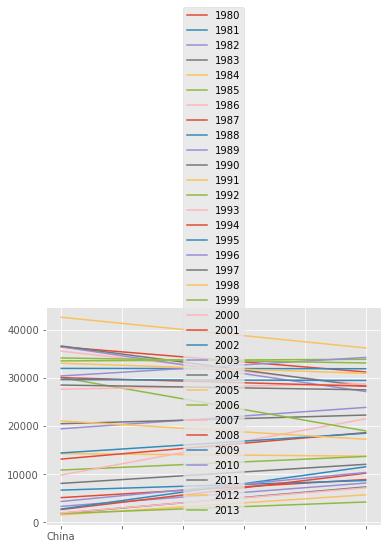

In [43]:
### type your answer here
df_CI.plot(kind='line')


<details><summary>Click here for a sample python solution</summary>

```python
    #The correct answer is:
    df_CI.plot(kind='line')
```

</details>


That doesn't look right...

Recall that *pandas* plots the indices on the x-axis and the columns as individual lines on the y-axis. Since `df_CI` is a dataframe with the `country` as the index and `years` as the columns, we must first transpose the dataframe using `transpose()` method to swap the row and columns.


In [44]:
df_CI = df_CI.transpose()
df_CI.head()

,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


*pandas* will auomatically graph the two countries on the same graph. Go ahead and plot the new transposed dataframe. Make sure to add a title to the plot and label the axes.


Text(0, 0.5, 'Number of Immigrants')

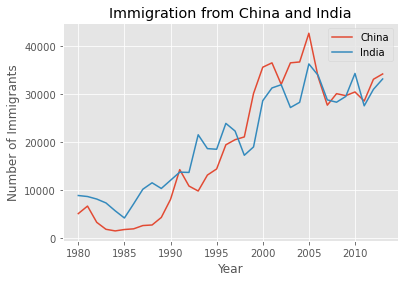

In [45]:
### type your answer here
df_CI.plot(kind='line')
plt.title('Immigration from China and India')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')




<details><summary>Click here for a sample python solution</summary>

```python
    #The correct answer is:
    df_CI.index = df_CI.index.map(int) # let's change the index values of df_CI to type integer for plotting
    df_CI.plot(kind='line')

    plt.title('Immigrants from China and India')
    plt.ylabel('Number of Immigrants')
    plt.xlabel('Years')

    plt.show()
```

</details>


<br>From the above plot, we can observe that the China and India have very similar immigration trends through the years.


*Note*: How come we didn't need to transpose Haiti's dataframe before plotting (like we did for df_CI)?

That's because `haiti` is a series as opposed to a dataframe, and has the years as its indices as shown below.

```python
print(type(haiti))
print(haiti.head(5))
```

> class 'pandas.core.series.Series' <br>
> 1980    1666 <br>
> 1981    3692 <br>
> 1982    3498 <br>
> 1983    2860 <br>
> 1984    1418 <br>
> Name: Haiti, dtype: int64 <br>


Line plot is a handy tool to display several dependent variables against one independent variable. However, it is recommended that no more than 5-10 lines on a single graph; any more than that and it becomes difficult to interpret.


**Question:** Compare the trend of top 5 countries that contributed the most to immigration to Canada.


      India  China  United Kingdom of Great Britain and Northern Ireland  \
1980   8880   5123                                              22045      
1981   8670   6682                                              24796      
1982   8147   3308                                              20620      
1983   7338   1863                                              10015      
1984   5704   1527                                              10170      
1985   4211   1816                                               9564      
1986   7150   1960                                               9470      
1987  10189   2643                                              21337      
1988  11522   2758                                              27359      
1989  10343   4323                                              23795      
1990  12041   8076                                              31668      
1991  13734  14255                                              23380      
1992  13673 

Text(0, 0.5, 'Country')

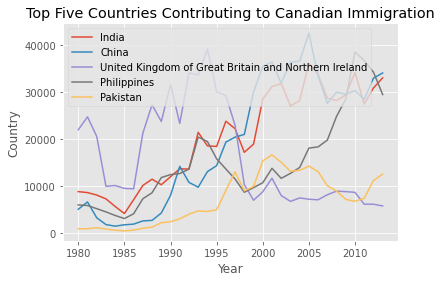

In [53]:
### type your answer here
#getting the data
inplace = True
df_can.sort_values(by='Total', ascending=False, axis=0, inplace=True)
df_top5 = df_can.head(5)
df_top5 = df_top5[years].transpose()
print(df_top5)

#Plotting the data
df_top5.index = df_top5.index.map(int)
df_top5.plot(kind='line')
plt.title('Top Five Countries Contributing to Canadian Immigration')
plt.xlabel('Year')
plt.ylabel('Country')


<details><summary>Click here for a sample python solution</summary>

```python
    #The correct answer is:    
    #Step 1: Get the dataset. Recall that we created a Total column that calculates cumulative immigration by country. 
    #We will sort on this column to get our top 5 countries using pandas sort_values() method.
    
    inplace = True # paramemter saves the changes to the original df_can dataframe
    df_can.sort_values(by='Total', ascending=False, axis=0, inplace=True)

    # get the top 5 entries
    df_top5 = df_can.head(5)

    # transpose the dataframe
    df_top5 = df_top5[years].transpose() 

    print(df_top5)


    #Step 2: Plot the dataframe. To make the plot more readeable, we will change the size using the `figsize` parameter.
    df_top5.index = df_top5.index.map(int) # let's change the index values of df_top5 to type integer for plotting
    df_top5.plot(kind='line', figsize=(14, 8)) # pass a tuple (x, y) size



    plt.title('Immigration Trend of Top 5 Countries')
    plt.ylabel('Number of Immigrants')
    plt.xlabel('Years')


    plt.show()

```

</details>


### Other Plots

Congratulations! you have learned how to wrangle data with python and create a line plot with Matplotlib. There are many other plotting styles available other than the default Line plot, all of which can be accessed by passing `kind` keyword to `plot()`. The full list of available plots are as follows:

*   `bar` for vertical bar plots
*   `barh` for horizontal bar plots
*   `hist` for histogram
*   `box` for boxplot
*   `kde` or `density` for density plots
*   `area` for area plots
*   `pie` for pie plots
*   `scatter` for scatter plots
*   `hexbin` for hexbin plot


### Thank you for completing this lab!

## Author

<a href="https://www.linkedin.com/in/aklson/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01" target="_blank">Alex Aklson</a>

### Other Contributors

[Jay Rajasekharan](https://www.linkedin.com/in/jayrajasekharan?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01),
[Ehsan M. Kermani](https://www.linkedin.com/in/ehsanmkermani?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01),
[Slobodan Markovic](https://www.linkedin.com/in/slobodan-markovic?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01),
[Weiqing Wang](https://www.linkedin.com/in/weiqing-wang-641640133/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01)

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                 |
| ----------------- | ------- | ------------- | ---------------------------------- |
| 2021-05-29        | 2.4     | Weiqing Wang  | Fixed typos and code smells.       |
| 2021-01-20        | 2.3     | Lakshmi Holla | Changed TOC cell markdown          |
| 2020-11-20        | 2.2     | Lakshmi Holla | Changed IBM box URL                |
| 2020-11-03        | 2.1     | Lakshmi Holla | Changed URL and info method        |
| 2020-08-27        | 2.0     | Lavanya       | Moved Lab to course repo in GitLab |

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
